# **Overview** 
This notebook aims to analyze and predict seat sales and fare prices for specific flights in August 2019, based on historical data from June 2019. The primary objective is to compare real-life results with predictions generated by different modeling approaches.

For a summary of the results, please head to the Conclusion section. 

**Real-Life Data**

The dataset provides the actual sales data for the months of June 2019 and a partial of August 2019. It includes information on:

- **Flight Numbers** (e.g., TR 202, TR 203)
- **Seat Capacity** for each flight (180 max)
- **Segment City Pairs** (e.g., SINPNH, PNHSIN)
- **Seats Sold**
- **Average Fare** in SGD for each flight segment

This data serves as the benchmark against which the prediction models will be evaluated.

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [108]:
file_path = 'zerd.xlsx'

# Read the first sheet
historical_data = pd.read_excel(file_path, sheet_name='Historical Data')
print("Historical Data DataFrame:")
print(historical_data)

# Read the second sheet
future_flights = pd.read_excel(file_path, sheet_name='Future Flights')
print("\nFuture Flights DataFrame:")
print(future_flights)

Historical Data DataFrame:
     BookingDate DepartureDate Flight Number  Seat Capacity SegmentCityPair  \
0     2018-08-03    2019-06-25        TR 202            180          SINPNH   
1     2018-08-03    2019-06-29        TR 203            180          PNHSIN   
2     2018-08-06    2019-06-11        TR 202            180          SINPNH   
3     2018-08-09    2019-06-11        TR 202            180          SINPNH   
4     2018-09-26    2019-06-09        TR 202            180          SINPNH   
...          ...           ...           ...            ...             ...   
2555  2019-06-28    2019-06-30        TR 203            180          PNHSIN   
2556  2019-06-29    2019-06-29        TR 203            180          PNHSIN   
2557  2019-06-29    2019-06-30        TR 202            180          SINPNH   
2558  2019-06-29    2019-06-30        TR 203            180          PNHSIN   
2559  2019-06-30    2019-06-30        TR 202            180          SINPNH   

      Seats Sold  Averag

In [109]:
historical_data

,BookingDate,DepartureDate,Flight Number,Seat Capacity,SegmentCityPair,Seats Sold,AverageFare (SGD),Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2018-08-03,2019-06-25,TR 202,180,SINPNH,1,3.7000,NaN,NaN,NaN
1,2018-08-03,2019-06-29,TR 203,180,PNHSIN,1,6.4349,NaN,NaN,Notes
2,2018-08-06,2019-06-11,TR 202,180,SINPNH,2,41.7000,NaN,NaN,Each line of data shows a summary of bookings ...
3,2018-08-09,2019-06-11,TR 202,180,SINPNH,1,63.7000,NaN,NaN,BookingDate
4,2018-09-26,2019-06-09,TR 202,180,SINPNH,1,46.7152,NaN,NaN,Departure Date
...,...,...,...,...,...,...,...,...,...,...
2555,2019-06-28,2019-06-30,TR 203,180,PNHSIN,1,198.2085,NaN,NaN,NaN
2556,2019-06-29,2019-06-29,TR 203,180,PNHSIN,1,60.9113,NaN,NaN,NaN
2557,2019-06-29,2019-06-30,TR 202,180,SINPNH,8,26.7375,NaN,NaN,NaN
2558,2019-06-29,2019-06-30,TR 203,180,PNHSIN,1,198.2085,NaN,NaN,NaN


In [110]:
future_flights

,DepartureDate,Flight Number,Seat Capacity,SegmentCityPair,Seats Sold,AverageFare (SGD),Unnamed: 6,Unnamed: 7
0,2019-08-04,TR 202,180,SINPNH,50,15.044384,NaN,Notes
1,2019-08-04,TR 203,180,PNHSIN,52,26.990975,NaN,Each line of data shows a summary of bookings ...
2,2019-08-05,TR 202,180,SINPNH,59,14.565322,NaN,Departure Date
3,2019-08-05,TR 203,180,PNHSIN,27,24.089670,NaN,Flight Number
4,2019-08-06,TR 202,180,SINPNH,67,34.611594,NaN,Seat Capacity
5,2019-08-06,TR 203,180,PNHSIN,49,14.928288,NaN,Segment City Pair
6,2019-08-07,TR 202,180,SINPNH,59,61.896822,NaN,Seats Sold
7,2019-08-07,TR 203,180,PNHSIN,42,11.681010,NaN,Average Fare
8,2019-08-08,TR 202,180,SINPNH,54,138.419413,NaN,NaN
9,2019-08-08,TR 203,180,PNHSIN,57,15.594739,NaN,All data are fictitious


In [111]:
description = historical_data.describe(include='all')
unique_values = historical_data.nunique()
missing_values = historical_data.isnull().sum()

print("Description:\n", description)
print("\nUnique values:\n", unique_values)
print("\nMissing values:\n", missing_values)

Description:
                 BookingDate                  DepartureDate Flight Number  \
count                  2560                           2560          2560   
unique                  NaN                            NaN             2   
top                     NaN                            NaN        TR 203   
freq                    NaN                            NaN          1309   
mean    2019-05-06 12:02:15  2019-06-15 16:14:48.750000128           NaN   
min     2018-08-03 00:00:00            2019-06-01 00:00:00           NaN   
25%     2019-04-20 00:00:00            2019-06-08 00:00:00           NaN   
50%     2019-05-17 00:00:00            2019-06-16 00:00:00           NaN   
75%     2019-06-03 00:00:00            2019-06-23 00:00:00           NaN   
max     2019-06-30 00:00:00            2019-06-30 00:00:00           NaN   
std                     NaN                            NaN           NaN   

        Seat Capacity SegmentCityPair   Seats Sold  AverageFare (SGD)  \


In [112]:
filtered_data = historical_data.loc[:, ~historical_data.columns.str.contains('^Unnamed')]

description = filtered_data.describe(include='all')
unique_values = filtered_data.nunique()
missing_values = filtered_data.isnull().sum()

print("Description:\n", description)
print("\nUnique values:\n", unique_values)
print("\nMissing values:\n", missing_values)

Description:
                 BookingDate                  DepartureDate Flight Number  \
count                  2560                           2560          2560   
unique                  NaN                            NaN             2   
top                     NaN                            NaN        TR 203   
freq                    NaN                            NaN          1309   
mean    2019-05-06 12:02:15  2019-06-15 16:14:48.750000128           NaN   
min     2018-08-03 00:00:00            2019-06-01 00:00:00           NaN   
25%     2019-04-20 00:00:00            2019-06-08 00:00:00           NaN   
50%     2019-05-17 00:00:00            2019-06-16 00:00:00           NaN   
75%     2019-06-03 00:00:00            2019-06-23 00:00:00           NaN   
max     2019-06-30 00:00:00            2019-06-30 00:00:00           NaN   
std                     NaN                            NaN           NaN   

        Seat Capacity SegmentCityPair   Seats Sold  AverageFare (SGD)  
c

In [113]:
# Iterate over each column in the DataFrame
for column in filtered_data.columns:
    
    # Get unique values of the column
    unique_values = filtered_data[column].unique()

    # Get data type of the column
    data_type = filtered_data[column].dtype

    # Prepare a string to print
    output = f"Column Name: {column}\n"
    output += f"Data Type: {data_type}\n"
    output += f"Unique Values: {unique_values}\n"
    output += "-" * 50  # separator

    # Print the output
    print(output)

Column Name: BookingDate
Data Type: datetime64[ns]
Unique Values: <DatetimeArray>
['2018-08-03 00:00:00', '2018-08-06 00:00:00', '2018-08-09 00:00:00',
 '2018-09-26 00:00:00', '2018-10-11 00:00:00', '2018-10-12 00:00:00',
 '2018-10-13 00:00:00', '2018-10-14 00:00:00', '2018-10-21 00:00:00',
 '2018-10-26 00:00:00',
 ...
 '2019-06-21 00:00:00', '2019-06-22 00:00:00', '2019-06-23 00:00:00',
 '2019-06-24 00:00:00', '2019-06-25 00:00:00', '2019-06-26 00:00:00',
 '2019-06-27 00:00:00', '2019-06-28 00:00:00', '2019-06-29 00:00:00',
 '2019-06-30 00:00:00']
Length: 189, dtype: datetime64[ns]
--------------------------------------------------
Column Name: DepartureDate
Data Type: datetime64[ns]
Unique Values: <DatetimeArray>
['2019-06-25 00:00:00', '2019-06-29 00:00:00', '2019-06-11 00:00:00',
 '2019-06-09 00:00:00', '2019-06-10 00:00:00', '2019-06-15 00:00:00',
 '2019-06-27 00:00:00', '2019-06-03 00:00:00', '2019-06-06 00:00:00',
 '2019-06-24 00:00:00', '2019-06-23 00:00:00', '2019-06-26 00:00:

In [114]:
# Group by SegmentCityPair and Flight Number and count occurrences
pairing_counts = filtered_data.groupby(['SegmentCityPair', 'Flight Number']).size().reset_index(name='Count')

# Sort the results by count in descending order
sorted_pairing_counts = pairing_counts.sort_values(by='Count', ascending=False)

# Print the most common pairings
print("Most common SegmentCityPair and Flight Number pairings:")
print(sorted_pairing_counts)

Most common SegmentCityPair and Flight Number pairings:
  SegmentCityPair Flight Number  Count
0          PNHSIN        TR 203   1309
1          SINPNH        TR 202   1251


# **Data Cleaning** 

In [115]:
df = filtered_data.drop(columns=['SegmentCityPair', 'Seat Capacity'])

# Calculate the average of the column, excluding negative and zero values
average_fare = df.loc[df["AverageFare (SGD)"] > 0, "AverageFare (SGD)"].mean()

# Replace negative and zero values with the calculated average
df["AverageFare (SGD)"] = df["AverageFare (SGD)"].apply(lambda x: average_fare if x <= 0 else x)

# Print the updated column
print(df["AverageFare (SGD)"].sort_values().to_list())

[2.2, 2.2, 2.5, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.333333333333334, 3.333333333333334, 3.7, 3.8876, 4.2, 4.2, 4.2, 4.2, 4.39565, 4.591299999999999, 4.5913, 4.9388, 4.9388, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.283333333333333, 5.5752, 5.5752, 5.5752, 5.5752, 5.5752, 5.5752, 5.5752, 5.5752, 5.5752, 5.5752, 5.6425, 5.6425, 5.6425, 5.6425, 5.6425, 5.6425, 5.642500000000001, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 6.3247, 6.372666666666667, 6.4349, 6.532933333333334, 6.7, 6.7, 6.865, 6.952540000000002, 7.2, 7.35, 7.412700000000001, 7.431866666666668, 7.5429, 7.594100000000001, 7.761533333333333, 8.0348, 8.112433333333334, 8.1988, 8.1988, 8.1988, 8.1988, 8.1988, 8.1988, 8.1988, 8.2978, 8.2978, 8.2978, 8.487414285714285, 8.598742857142858, 8.633333333333335, 8.9202, 8.961566666666668, 8.996609090909091, 9.0, 9.018650000000001, 9.059000000000001, 9.125309090909091, 9.2, 10.1553, 10.1766, 10.4944, 10.4944, 10.4944, 10.4944,

In [116]:
df.rename(columns={'Seats Sold': 'SeatsSold'}, inplace=True)
df.rename(columns={'Flight Number': 'FlightNumber'}, inplace=True)
df.rename(columns={'AverageFare (SGD)': 'AverageFare(SGD)'}, inplace=True)

In [117]:
df

,BookingDate,DepartureDate,FlightNumber,SeatsSold,AverageFare(SGD)
0,2018-08-03,2019-06-25,TR 202,1,3.7000
1,2018-08-03,2019-06-29,TR 203,1,6.4349
2,2018-08-06,2019-06-11,TR 202,2,41.7000
3,2018-08-09,2019-06-11,TR 202,1,63.7000
4,2018-09-26,2019-06-09,TR 202,1,46.7152
...,...,...,...,...,...
2555,2019-06-28,2019-06-30,TR 203,1,198.2085
2556,2019-06-29,2019-06-29,TR 203,1,60.9113
2557,2019-06-29,2019-06-30,TR 202,8,26.7375
2558,2019-06-29,2019-06-30,TR 203,1,198.2085


In [118]:
df_TR202 = df[df['FlightNumber'] == 'TR 202']
df_TR203 = df[df['FlightNumber'] == 'TR 203']

# Display the first few rows of each DataFrame to verify
print("DataFrame for FlightNumber TR 202:")
print(df_TR202.head())

print("\nDataFrame for FlightNumber TR 203:")
print(df_TR203.head())

DataFrame for FlightNumber TR 202:
  BookingDate DepartureDate FlightNumber  SeatsSold  AverageFare(SGD)
0  2018-08-03    2019-06-25       TR 202          1            3.7000
2  2018-08-06    2019-06-11       TR 202          2           41.7000
3  2018-08-09    2019-06-11       TR 202          1           63.7000
4  2018-09-26    2019-06-09       TR 202          1           46.7152
5  2018-10-11    2019-06-10       TR 202          2           46.7000

DataFrame for FlightNumber TR 203:
   BookingDate DepartureDate FlightNumber  SeatsSold  AverageFare(SGD)
1   2018-08-03    2019-06-29       TR 203          1            6.4349
6   2018-10-11    2019-06-15       TR 203          2           46.7000
7   2018-10-12    2019-06-27       TR 203          1           22.1402
8   2018-10-13    2019-06-29       TR 203          3           22.1402
10  2018-10-14    2019-06-06       TR 203          6           46.7000


In [119]:
# Calculate total fare by multiplying AverageFare(SGD) by SeatsSold
df_TR202['TotalFare'] = df_TR202['AverageFare(SGD)'] * df_TR202['SeatsSold']
df_TR203['TotalFare'] = df_TR203['AverageFare(SGD)'] * df_TR203['SeatsSold']

# Group by DepartureDate and calculate the sum of TotalFare and SeatsSold
grouped_TR202 = df_TR202.groupby('DepartureDate').agg({'TotalFare': 'sum', 'SeatsSold': 'sum'}).reset_index()
grouped_TR203 = df_TR203.groupby('DepartureDate').agg({'TotalFare': 'sum', 'SeatsSold': 'sum'}).reset_index()

# Calculate the weighted average fare
grouped_TR202['WeightedAverageFare(SGD)'] = grouped_TR202['TotalFare'] / grouped_TR202['SeatsSold']
grouped_TR203['WeightedAverageFare(SGD)'] = grouped_TR203['TotalFare'] / grouped_TR203['SeatsSold']

# Rename columns for clarity
grouped_TR202.rename(columns={'SeatsSold': 'TotalSeatsSold'}, inplace=True)
grouped_TR203.rename(columns={'SeatsSold': 'TotalSeatsSold'}, inplace=True)

# Merge the new columns back into the original DataFrames
df_TR202 = df_TR202.merge(grouped_TR202[['DepartureDate', 'WeightedAverageFare(SGD)', 'TotalSeatsSold']], on='DepartureDate', how='left')
df_TR203 = df_TR203.merge(grouped_TR203[['DepartureDate', 'WeightedAverageFare(SGD)', 'TotalSeatsSold']], on='DepartureDate', how='left')
df_TR202.drop(columns=['TotalFare'], inplace=True)
df_TR203.drop(columns=['TotalFare'], inplace=True)

# Display the updated DataFrames
print("Updated DataFrame for FlightNumber TR 202:")
print(df_TR202)

print("\nUpdated DataFrame for FlightNumber TR 203:")
print(df_TR203)

Updated DataFrame for FlightNumber TR 202:
     BookingDate DepartureDate FlightNumber  SeatsSold  AverageFare(SGD)  \
0     2018-08-03    2019-06-25       TR 202          1            3.7000   
1     2018-08-06    2019-06-11       TR 202          2           41.7000   
2     2018-08-09    2019-06-11       TR 202          1           63.7000   
3     2018-09-26    2019-06-09       TR 202          1           46.7152   
4     2018-10-11    2019-06-10       TR 202          2           46.7000   
...          ...           ...          ...        ...               ...   
1246  2019-06-28    2019-06-28       TR 202          5           71.1600   
1247  2019-06-28    2019-06-29       TR 202         10           82.8200   
1248  2019-06-28    2019-06-30       TR 202          6           28.9000   
1249  2019-06-29    2019-06-30       TR 202          8           26.7375   
1250  2019-06-30    2019-06-30       TR 202          1           41.7000   

      WeightedAverageFare(SGD)  TotalSeatsSo

In [120]:
# Merge df_TR202 and df_TR203 into a new DataFrame df_zerd
df_zerd = pd.concat([df_TR202, df_TR203], ignore_index=True)

df_zerd

,BookingDate,DepartureDate,FlightNumber,SeatsSold,AverageFare(SGD),WeightedAverageFare(SGD),TotalSeatsSold
0,2018-08-03,2019-06-25,TR 202,1,3.7000,45.012600,170
1,2018-08-06,2019-06-11,TR 202,2,41.7000,92.305012,180
2,2018-08-09,2019-06-11,TR 202,1,63.7000,92.305012,180
3,2018-09-26,2019-06-09,TR 202,1,46.7152,105.195083,180
4,2018-10-11,2019-06-10,TR 202,2,46.7000,102.394362,180
...,...,...,...,...,...,...,...
2555,2019-06-28,2019-06-28,TR 203,1,86.5928,40.269855,154
2556,2019-06-28,2019-06-29,TR 203,5,61.5698,45.923806,159
2557,2019-06-28,2019-06-30,TR 203,1,198.2085,85.649748,180
2558,2019-06-29,2019-06-29,TR 203,1,60.9113,45.923806,159


# **Feature Engineering** 


In [121]:
df_fe = df_zerd.copy()

# Define holidays in Malaysia and Singapore for the year 2019
malaysia_holidays_2019 = [
    '2019-06-01', '2019-06-02', '2019-06-03', '2019-06-05', '2019-06-06', '2019-06-21',
]
singapore_holidays_2019 = [
    '2019-01-01', '2019-02-05', '2019-02-06', '2019-04-19', '2019-05-01', '2019-05-19',
    '2019-05-20', '2019-06-05', '2019-08-09', '2019-08-11', '2019-08-12', '2019-10-27',
    '2019-10-28', '2019-12-25'
]

# Combine holidays into a single list
holidays_2019 = malaysia_holidays_2019 + singapore_holidays_2019
holidays_2019 = pd.to_datetime(holidays_2019)

# Convert dates to datetime format
df_fe['BookingDate'] = pd.to_datetime(df['BookingDate'])
df_fe['DepartureDate'] = pd.to_datetime(df['DepartureDate'])

# Determine if the booking date and departure date are holidays
df_fe['IsBookingDateHoliday'] = df['BookingDate'].isin(holidays_2019)
df_fe['IsDepartureDateHoliday'] = df['DepartureDate'].isin(holidays_2019)

# Calculate lead time in days
df_fe['LeadTime(Days_to_DepartureDate)'] = (df['DepartureDate'] - df['BookingDate']).dt.days

# Calculate total revenue
df_fe['Total Revenue'] = df['SeatsSold'] * df['AverageFare(SGD)']

# Extract features from BookingDate
df_fe['BookingYear'] = df['BookingDate'].dt.year
df_fe['BookingMonth'] = df['BookingDate'].dt.month
df_fe['BookingDay'] = df['BookingDate'].dt.day
df_fe['BookingDayOfWeek'] = df['BookingDate'].dt.dayofweek
df_fe['IsBookingDateWeekend'] = df_fe['BookingDayOfWeek'].isin([5, 6])

# Extract features from DepartureDate
df_fe['DepartureYear'] = df['DepartureDate'].dt.year
df_fe['DepartureMonth'] = df['DepartureDate'].dt.month
df_fe['DepartureDay'] = df['DepartureDate'].dt.day
df_fe['DepartureDayOfWeek'] = df['DepartureDate'].dt.dayofweek
df_fe['IsDepartureDateWeekend'] = df_fe['DepartureDayOfWeek'].isin([5, 6])

df_fe = df_fe[sorted(df_fe.columns)]
df_fe

,AverageFare(SGD),BookingDate,BookingDay,BookingDayOfWeek,BookingMonth,BookingYear,DepartureDate,DepartureDay,DepartureDayOfWeek,DepartureMonth,...,FlightNumber,IsBookingDateHoliday,IsBookingDateWeekend,IsDepartureDateHoliday,IsDepartureDateWeekend,LeadTime(Days_to_DepartureDate),SeatsSold,Total Revenue,TotalSeatsSold,WeightedAverageFare(SGD)
0,3.7000,2018-08-03,3,4,8,2018,2019-06-25,25,1,6,...,TR 202,False,False,False,False,326,1,3.7000,170,45.012600
1,41.7000,2018-08-03,3,4,8,2018,2019-06-29,29,5,6,...,TR 202,False,False,False,True,330,2,6.4349,180,92.305012
2,63.7000,2018-08-06,6,0,8,2018,2019-06-11,11,1,6,...,TR 202,False,False,False,False,309,1,83.4000,180,92.305012
3,46.7152,2018-08-09,9,3,8,2018,2019-06-11,11,1,6,...,TR 202,False,False,False,False,306,1,63.7000,180,105.195083
4,46.7000,2018-09-26,26,2,9,2018,2019-06-09,9,6,6,...,TR 202,False,False,False,True,256,2,46.7152,180,102.394362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,86.5928,2019-06-28,28,4,6,2019,2019-06-30,30,6,6,...,TR 203,False,False,False,True,2,1,198.2085,154,40.269855
2556,61.5698,2019-06-29,29,5,6,2019,2019-06-29,29,5,6,...,TR 203,False,True,False,True,0,5,60.9113,159,45.923806
2557,198.2085,2019-06-29,29,5,6,2019,2019-06-30,30,6,6,...,TR 203,False,True,False,True,1,1,213.9000,180,85.649748
2558,60.9113,2019-06-29,29,5,6,2019,2019-06-30,30,6,6,...,TR 203,False,True,False,True,1,1,198.2085,159,45.923806


In [122]:
# Separate the DataFrame according to Flight Number
flight_number_groups = {flight_number: group for flight_number, group in df_fe.groupby('FlightNumber')}

# List to store the names of the DataFrames
df_names = []

# Create individual DataFrames for each Flight Number
for flight_number, group in flight_number_groups.items():
    sanitized_flight_number = flight_number.replace(' ', '_')
    df_name = f'df_{sanitized_flight_number}'
    globals()[df_name] = group
    df_names.append(df_name)

# Print the names of the DataFrames
print(df_names)

['df_TR_202', 'df_TR_203']


# **Data Transformation** 

In [123]:
df_dt = df_fe.drop(columns=['BookingDate','DepartureDate']) 

df_dt

,AverageFare(SGD),BookingDay,BookingDayOfWeek,BookingMonth,BookingYear,DepartureDay,DepartureDayOfWeek,DepartureMonth,DepartureYear,FlightNumber,IsBookingDateHoliday,IsBookingDateWeekend,IsDepartureDateHoliday,IsDepartureDateWeekend,LeadTime(Days_to_DepartureDate),SeatsSold,Total Revenue,TotalSeatsSold,WeightedAverageFare(SGD)
0,3.7000,3,4,8,2018,25,1,6,2019,TR 202,False,False,False,False,326,1,3.7000,170,45.012600
1,41.7000,3,4,8,2018,29,5,6,2019,TR 202,False,False,False,True,330,2,6.4349,180,92.305012
2,63.7000,6,0,8,2018,11,1,6,2019,TR 202,False,False,False,False,309,1,83.4000,180,92.305012
3,46.7152,9,3,8,2018,11,1,6,2019,TR 202,False,False,False,False,306,1,63.7000,180,105.195083
4,46.7000,26,2,9,2018,9,6,6,2019,TR 202,False,False,False,True,256,2,46.7152,180,102.394362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,86.5928,28,4,6,2019,30,6,6,2019,TR 203,False,False,False,True,2,1,198.2085,154,40.269855
2556,61.5698,29,5,6,2019,29,5,6,2019,TR 203,False,True,False,True,0,5,60.9113,159,45.923806
2557,198.2085,29,5,6,2019,30,6,6,2019,TR 203,False,True,False,True,1,1,213.9000,180,85.649748
2558,60.9113,29,5,6,2019,30,6,6,2019,TR 203,False,True,False,True,1,1,198.2085,159,45.923806


Columns to Become Numerical

- **FlightNumber**: Since flight numbers are categorical and there is no natural ordering, one-hot encoding is appropriate.
- **IsBookingDateHoliday**: This is a binary column, but you can encode it.
- **IsBookingDateWeekend**: Similar to `IsBookingDateHoliday`, you can encode this binary column.
- **IsDepartureDateHoliday**: Encode.
- **IsDepartureDateWeekend**: Encode.

Columns that Don’t Need to Become Numerical
The following columns are already numeric or can be used directly without any further encoding:

- **AverageFare(SGD)**
- **BookingDay**: Already numeric.
- **BookingMonth**: Already numeric.
- **BookingYear**: Already numeric.
- **DepartureDay**: Already numeric.
- **DepartureMonth**: Already numeric.
- **DepartureYear**: Already numeric.
- **LeadTime(Days_to_DepartureDate)**: This is a numeric column that represents the difference between the booking date and the departure date.
- **SeatsSold**: This is the target variable when predicting the number of seats sold.
- **Total Revenue**: This could be derived from `AverageFare(SGD)` and `SeatsSold`.
- **BookingDayOfWeek**: Already numeric.
- **DepartureDayOfWeek**: Already numeric.


In [124]:
df_encoded = df_dt.copy()

# Mapping dictionary to convert True/False to 1/2
bool_mapping = {False: 1, True: 2}
bool_mapping_FlightNumber ={"TR 202": 1, "TR 203": 2}

# Apply the mapping to the specified columns
df_encoded['FlightNumber'] = df_encoded['FlightNumber'].map(bool_mapping_FlightNumber)
df_encoded['IsBookingDateHoliday'] = df_encoded['IsBookingDateHoliday'].map(bool_mapping)
df_encoded['IsBookingDateWeekend'] = df_encoded['IsBookingDateWeekend'].map(bool_mapping)
df_encoded['IsDepartureDateHoliday'] = df_encoded['IsDepartureDateHoliday'].map(bool_mapping)
df_encoded['IsDepartureDateWeekend'] = df_encoded['IsDepartureDateWeekend'].map(bool_mapping)

df_encoded

,AverageFare(SGD),BookingDay,BookingDayOfWeek,BookingMonth,BookingYear,DepartureDay,DepartureDayOfWeek,DepartureMonth,DepartureYear,FlightNumber,IsBookingDateHoliday,IsBookingDateWeekend,IsDepartureDateHoliday,IsDepartureDateWeekend,LeadTime(Days_to_DepartureDate),SeatsSold,Total Revenue,TotalSeatsSold,WeightedAverageFare(SGD)
0,3.7000,3,4,8,2018,25,1,6,2019,1,1,1,1,1,326,1,3.7000,170,45.012600
1,41.7000,3,4,8,2018,29,5,6,2019,1,1,1,1,2,330,2,6.4349,180,92.305012
2,63.7000,6,0,8,2018,11,1,6,2019,1,1,1,1,1,309,1,83.4000,180,92.305012
3,46.7152,9,3,8,2018,11,1,6,2019,1,1,1,1,1,306,1,63.7000,180,105.195083
4,46.7000,26,2,9,2018,9,6,6,2019,1,1,1,1,2,256,2,46.7152,180,102.394362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,86.5928,28,4,6,2019,30,6,6,2019,2,1,1,1,2,2,1,198.2085,154,40.269855
2556,61.5698,29,5,6,2019,29,5,6,2019,2,1,2,1,2,0,5,60.9113,159,45.923806
2557,198.2085,29,5,6,2019,30,6,6,2019,2,1,2,1,2,1,1,213.9000,180,85.649748
2558,60.9113,29,5,6,2019,30,6,6,2019,2,1,2,1,2,1,1,198.2085,159,45.923806


Columns to Apply StandardScaler or Normalization
- **AverageFare(SGD)**: This is a continuous numerical variable representing the fare, which can have a wide range of values.
- **LeadTime(Days_to_DepartureDate)**: This is a continuous numerical variable representing the lead time in days, which could vary significantly.
- **SeatsSold**: This is a continuous numerical variable that might also vary across different ranges.
- **Total Revenue**: This is a continuous numerical variable derived from SeatsSold and AverageFare(SGD), and can have a large range of values.

Columns that Typically Do Not Need Scaling
- **BookingDay, BookingDayOfWeek, BookingMonth, BookingYear**: These are categorical variables encoded as numbers, so they typically do not require scaling.
- **DepartureDay, DepartureDayOfWeek, DepartureMonth, DepartureYear**: Similar to booking date columns, these are categorical variables that represent discrete time components.
- **FlightNumber**: This has already been one-hot encoded, so it doesn’t need scaling.
- **IsBookingDateHoliday, IsBookingDateWeekend, IsDepartureDateHoliday, IsDepartureDateWeekend**: These are binary variables that have been encoded as 1 and 2, so they don't need scaling.

In [125]:
# Create separate scalers for each feature
fare_scaler = StandardScaler()
leadtime_scaler = StandardScaler()
seats_scaler = StandardScaler()
revenue_scaler = StandardScaler()
weighted_fare_scaler = StandardScaler()
total_seats_scaler = StandardScaler()

# Scale each feature separately
df_encoded['AverageFare(SGD)'] = fare_scaler.fit_transform(df_encoded[['AverageFare(SGD)']])
df_encoded['LeadTime(Days_to_DepartureDate)'] = leadtime_scaler.fit_transform(df_encoded[['LeadTime(Days_to_DepartureDate)']])
df_encoded['SeatsSold'] = seats_scaler.fit_transform(df_encoded[['SeatsSold']])
df_encoded['Total Revenue'] = revenue_scaler.fit_transform(df_encoded[['Total Revenue']])
df_encoded['WeightedAverageFare(SGD)'] = weighted_fare_scaler.fit_transform(df_encoded[['WeightedAverageFare(SGD)']])
df_encoded['TotalSeatsSold'] = total_seats_scaler.fit_transform(df_encoded[['TotalSeatsSold']])

df_encoded

,AverageFare(SGD),BookingDay,BookingDayOfWeek,BookingMonth,BookingYear,DepartureDay,DepartureDayOfWeek,DepartureMonth,DepartureYear,FlightNumber,IsBookingDateHoliday,IsBookingDateWeekend,IsDepartureDateHoliday,IsDepartureDateWeekend,LeadTime(Days_to_DepartureDate),SeatsSold,Total Revenue,TotalSeatsSold,WeightedAverageFare(SGD)
0,-1.346315,3,4,8,2018,25,1,6,2019,1,1,1,1,1,7.243759,-0.894495,-0.769210,-0.074925,-0.403676
1,-0.301600,3,4,8,2018,29,5,6,2019,1,1,1,1,2,7.345133,-0.595552,-0.759358,0.692001,1.703136
2,0.303235,6,0,8,2018,11,1,6,2019,1,1,1,1,1,6.812922,-0.894495,-0.482115,0.692001,1.703136
3,-0.163719,9,3,8,2018,11,1,6,2019,1,1,1,1,1,6.736892,-0.894495,-0.553078,0.692001,2.277371
4,-0.164137,26,2,9,2018,9,6,6,2019,1,1,1,1,2,5.469723,-0.595552,-0.614261,0.692001,2.152603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.932616,28,4,6,2019,30,6,6,2019,2,1,1,1,2,-0.967493,-0.894495,-0.068553,-1.302008,-0.614959
2556,0.244671,29,5,6,2019,29,5,6,2019,2,1,2,1,2,-1.018180,0.301279,-0.563124,-0.918544,-0.363083
2557,4.001212,29,5,6,2019,30,6,6,2019,2,1,2,1,2,-0.992836,-0.894495,-0.012029,0.692001,1.406653
2558,0.226567,29,5,6,2019,30,6,6,2019,2,1,2,1,2,-0.992836,-0.894495,-0.068553,-0.918544,-0.363083


Columns That Needs One-Hot Encoding

One-hot encoding is appropriate for categorical variables with no intrinsic order, it needs one-hot encoding to prevent unintended weightage in machine learning models.

In [126]:
# One-Hot Encode the specified columns
df_encoded = pd.get_dummies(df_encoded, columns=[
    'BookingDay', 'BookingDayOfWeek', 'BookingMonth', 'BookingYear',
    'DepartureDay', 'DepartureDayOfWeek', 'DepartureMonth', 'DepartureYear',
    'FlightNumber', 'IsBookingDateHoliday', 'IsBookingDateWeekend',
    'IsDepartureDateHoliday', 'IsDepartureDateWeekend'
])

df_encoded

,AverageFare(SGD),LeadTime(Days_to_DepartureDate),SeatsSold,Total Revenue,TotalSeatsSold,WeightedAverageFare(SGD),BookingDay_1,BookingDay_2,BookingDay_3,BookingDay_4,...,FlightNumber_1,FlightNumber_2,IsBookingDateHoliday_1,IsBookingDateHoliday_2,IsBookingDateWeekend_1,IsBookingDateWeekend_2,IsDepartureDateHoliday_1,IsDepartureDateHoliday_2,IsDepartureDateWeekend_1,IsDepartureDateWeekend_2
0,-1.346315,7.243759,-0.894495,-0.769210,-0.074925,-0.403676,False,False,True,False,...,True,False,True,False,True,False,True,False,True,False
1,-0.301600,7.345133,-0.595552,-0.759358,0.692001,1.703136,False,False,True,False,...,True,False,True,False,True,False,True,False,False,True
2,0.303235,6.812922,-0.894495,-0.482115,0.692001,1.703136,False,False,False,False,...,True,False,True,False,True,False,True,False,True,False
3,-0.163719,6.736892,-0.894495,-0.553078,0.692001,2.277371,False,False,False,False,...,True,False,True,False,True,False,True,False,True,False
4,-0.164137,5.469723,-0.595552,-0.614261,0.692001,2.152603,False,False,False,False,...,True,False,True,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.932616,-0.967493,-0.894495,-0.068553,-1.302008,-0.614959,False,False,False,False,...,False,True,True,False,True,False,True,False,False,True
2556,0.244671,-1.018180,0.301279,-0.563124,-0.918544,-0.363083,False,False,False,False,...,False,True,True,False,False,True,True,False,False,True
2557,4.001212,-0.992836,-0.894495,-0.012029,0.692001,1.406653,False,False,False,False,...,False,True,True,False,False,True,True,False,False,True
2558,0.226567,-0.992836,-0.894495,-0.068553,-0.918544,-0.363083,False,False,False,False,...,False,True,True,False,False,True,True,False,False,True


In [127]:
pd.set_option('display.max_columns', None)
print(df_encoded.head())  

   AverageFare(SGD)  LeadTime(Days_to_DepartureDate)  SeatsSold  \
0         -1.346315                         7.243759  -0.894495   
1         -0.301600                         7.345133  -0.595552   
2          0.303235                         6.812922  -0.894495   
3         -0.163719                         6.736892  -0.894495   
4         -0.164137                         5.469723  -0.595552   

   Total Revenue  TotalSeatsSold  WeightedAverageFare(SGD)  BookingDay_1  \
0      -0.769210       -0.074925                 -0.403676         False   
1      -0.759358        0.692001                  1.703136         False   
2      -0.482115        0.692001                  1.703136         False   
3      -0.553078        0.692001                  2.277371         False   
4      -0.614261        0.692001                  2.152603         False   

   BookingDay_2  BookingDay_3  BookingDay_4  BookingDay_5  BookingDay_6  \
0         False          True         False         False        

# **Regression Method**

In this section, an input date and input flight number was used to trigger the regression model to provide two versions of predicted AverageFare(SGD) and SeatsSold. 

While the regression model used provides a reasonable estimate based on the available data, the predictions might not accurately reflect the reality of seat sales in August 2019 due to its limitations in handling time-dependent factors. Additionally, the limited dataset (only June 2019) further constrains the model's ability to make accurate predictions.

**Key Points**
- **Model Limitation**: The model might struggle with time-dependent factors, which are crucial in the airline industry due to fluctuating demand.
- **Data Limitation**: The predictions are based on a limited dataset (June 2019), which may not capture the full seasonality or trends affecting sales in August 2019.

In [128]:
import pandas as pd
from pycaret.regression import setup, compare_models, create_model, tune_model, finalize_model, predict_model, load_model, save_model

# Setup PyCaret for AverageFare(SGD)
s_fare = setup(
    data=df_encoded,
    target='AverageFare(SGD)',
    use_gpu=True,
    session_id=123,
    normalize=True,  # Normalize the data
    transform_target=True  # Apply log transformation to the target
)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

,Description,Value
0,Session id,123
1,Target,AverageFare(SGD)
2,Target type,Regression
3,Original data shape,"(2560, 106)"
4,Transformed data shape,"(2560, 106)"
5,Transformed train set shape,"(1792, 106)"
6,Transformed test set shape,"(768, 106)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

In [129]:
# Train the model for AverageFare(SGD)
best_model_fare = compare_models(include=['gbr', 'lightgbm', 'rf', 'et', 'ada', 'knn', 'lasso'])
final_model_fare = finalize_model(tune_model(create_model(best_model_fare)))
save_model(final_model_fare, 'final_model_fare')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4898,0.5936,0.7669,0.4021,0.3149,2.5900,0.4540
lightgbm,Light Gradient Boosting Machine,0.4997,0.5946,0.7681,0.3987,0.3175,2.1552,1.0580
et,Extra Trees Regressor,0.5059,0.6126,0.7783,0.3848,0.3140,3.3524,0.4280
gbr,Gradient Boosting Regressor,0.5001,0.6096,0.7778,0.3845,0.3187,2.4443,0.3920
ada,AdaBoost Regressor,0.5869,0.7805,0.8791,0.2166,0.3936,2.3812,0.2380
knn,K Neighbors Regressor,0.6565,0.8956,0.9431,0.0951,0.3950,2.8118,0.0840
lasso,Lasso Regression,0.7107,1.0396,1.0159,-0.0478,0.4396,1.7793,0.0580


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5014,0.5336,0.7305,0.3985,0.3284,2.8502
1,0.4776,0.5088,0.7133,0.4018,0.2897,2.6800
2,0.5192,0.5706,0.7554,0.3984,0.3327,1.3318
3,0.4489,0.6189,0.7867,0.3412,0.3072,2.9323
4,0.4534,0.4281,0.6543,0.4367,0.3025,1.1173
5,0.5215,0.6340,0.7962,0.3155,0.3392,1.3974
6,0.5010,0.8434,0.9183,0.3995,0.3361,7.7747
7,0.4988,0.5057,0.7112,0.4951,0.2948,0.9191
8,0.4807,0.7474,0.8645,0.3707,0.3140,1.0920


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5303,0.5843,0.7644,0.3413,0.3685,1.7665
1,0.5407,0.6194,0.7870,0.2717,0.3707,1.4734
2,0.5492,0.6039,0.7771,0.3632,0.3641,1.3262
3,0.5019,0.6891,0.8302,0.2664,0.3437,2.7646
4,0.4893,0.4701,0.6857,0.3814,0.3404,1.0142
5,0.5663,0.6742,0.8211,0.2721,0.3837,1.1433
6,0.5609,1.0046,1.0023,0.2847,0.3896,5.9182
7,0.5628,0.6499,0.8062,0.3512,0.3578,0.8261
8,0.5263,0.9001,0.9488,0.2421,0.3628,1.4617


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['LeadTime(Days_to_DepartureDate)',
                                              'SeatsSold', 'Total Revenue',
                                              'TotalSeatsSold',
                                              'WeightedAverageFare(SGD)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
           

In [130]:
# Setup PyCaret for SeatsSold
s_seats = setup(
    data=df_encoded,
    target='SeatsSold',
    use_gpu=True,
    session_id=123,
    normalize=True,  # Normalize the data
    transform_target=True  # Apply log transformation to the target
)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

,Description,Value
0,Session id,123
1,Target,SeatsSold
2,Target type,Regression
3,Original data shape,"(2560, 106)"
4,Transformed data shape,"(2560, 106)"
5,Transformed train set shape,"(1792, 106)"
6,Transformed test set shape,"(768, 106)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

In [131]:
# Train the model for SeatsSold
best_model_seats = compare_models(include=['gbr', 'lightgbm', 'rf', 'et', 'ada', 'knn', 'lasso'])
final_model_seats = finalize_model(tune_model(create_model(best_model_seats)))
save_model(final_model_seats, 'final_model_seats')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6803,0.9915,0.9908,0.0125,0.4082,20.3851,1.3620
gbr,Gradient Boosting Regressor,0.6679,1.0012,0.9955,0.0047,0.4297,16.1585,0.4450
rf,Random Forest Regressor,0.6772,1.0002,0.9957,0.0033,0.4233,18.8984,0.3620
ada,AdaBoost Regressor,0.6935,1.0395,1.0151,-0.0355,0.4391,13.0227,0.1330
lasso,Lasso Regression,0.6962,1.0865,1.0377,-0.0823,0.4055,15.0153,0.0600
knn,K Neighbors Regressor,0.7296,1.1217,1.0543,-0.1178,0.4214,19.7562,0.0980
et,Extra Trees Regressor,0.7426,1.1368,1.0623,-0.1408,0.4094,24.1155,0.3680


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6691,0.7538,0.8682,0.0368,0.3820,18.8784
1,0.6373,0.7879,0.8876,0.0876,0.3889,20.3773
2,0.6497,0.8446,0.9190,0.1269,0.3922,14.2003
3,0.6828,0.9352,0.9671,0.0538,0.4122,25.2837
4,0.5727,0.7839,0.8854,-0.0122,0.3670,24.2667
5,0.6884,1.1827,1.0875,-0.0173,0.4280,23.7781
6,0.7426,1.0806,1.0395,-0.0246,0.4541,25.2910
7,0.6531,0.9450,0.9721,-0.0460,0.3921,21.0816
8,0.7439,1.2757,1.1295,0.0498,0.4446,11.8724


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6369,0.7455,0.8634,0.0473,0.3912,14.5194
1,0.6272,0.7652,0.8748,0.1138,0.4162,18.9805
2,0.6774,0.8897,0.9432,0.0802,0.4235,14.3081
3,0.6786,0.9656,0.9827,0.0230,0.4270,21.2679
4,0.5643,0.7774,0.8817,-0.0038,0.3663,23.4566
5,0.6824,1.1574,1.0758,0.0044,0.4376,20.1418
6,0.6915,1.0230,1.0115,0.0299,0.4613,21.3240
7,0.6336,0.9180,0.9581,-0.0161,0.4033,18.2999
8,0.7637,1.3353,1.1555,0.0055,0.4706,11.1757


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 1612, number of used fea

(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['AverageFare(SGD)',
                                              'LeadTime(Days_to_DepartureDate)',
                                              'Total Revenue', 'TotalSeatsSold',
                                              'WeightedAverageFare(SGD)'],
                                     transform...
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('actual_estimator',
                  LGBMRegressor(bagging_fraction=0.7, bagging_freq=6,
                                device='gpu', feature_fraction=0.5,
                            

In [132]:
# Setup PyCaret for WeightedAverageFare(SGD)
s_seats = setup(
    data=df_encoded,
    target='WeightedAverageFare(SGD)',
    use_gpu=True,
    session_id=123,
    normalize=True,  # Normalize the data
    transform_target=True  # Apply log transformation to the target
)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

,Description,Value
0,Session id,123
1,Target,WeightedAverageFare(SGD)
2,Target type,Regression
3,Original data shape,"(2560, 106)"
4,Transformed data shape,"(2560, 106)"
5,Transformed train set shape,"(1792, 106)"
6,Transformed test set shape,"(768, 106)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

In [133]:
# Train the model for WeightedAverageFare(SGD)
best_model_total_fare = compare_models(include=['gbr', 'lightgbm', 'rf', 'et', 'ada', 'knn', 'lasso'])
final_model_total_fare = finalize_model(tune_model(create_model(best_model_total_fare)))
save_model(final_model_total_fare, 'final_model_total_fare')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.3147,0.2428,0.4921,0.7568,0.2212,0.6378,0.3590
lightgbm,Light Gradient Boosting Machine,0.3530,0.2517,0.5001,0.7483,0.2340,0.7739,1.3380
et,Extra Trees Regressor,0.3323,0.2601,0.5095,0.7391,0.2214,0.6833,0.3760
gbr,Gradient Boosting Regressor,0.3998,0.2883,0.5366,0.7111,0.2568,0.8902,0.4520
ada,AdaBoost Regressor,0.4954,0.3725,0.6100,0.6268,0.3138,1.3115,0.1730
knn,K Neighbors Regressor,0.7155,0.7770,0.8805,0.2222,0.4016,1.5547,0.0990
lasso,Lasso Regression,0.8495,1.0192,1.0091,-0.0193,0.5653,1.0691,0.0610


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3142,0.2555,0.5055,0.7533,0.2282,0.6190
1,0.3270,0.2825,0.5315,0.7202,0.2439,0.5850
2,0.3183,0.2373,0.4871,0.7705,0.2392,0.6183
3,0.3346,0.2746,0.5240,0.7325,0.2309,0.8042
4,0.3164,0.2265,0.4760,0.7633,0.1961,0.5771
5,0.3171,0.2629,0.5128,0.7387,0.2128,0.6271
6,0.2801,0.1975,0.4444,0.8137,0.2004,0.4298
7,0.3243,0.2283,0.4778,0.7734,0.2420,0.6580
8,0.2852,0.2189,0.4679,0.7462,0.2021,0.7981


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4672,0.3503,0.5918,0.6618,0.2911,0.8568
1,0.5141,0.4234,0.6507,0.5807,0.3184,0.9814
2,0.5209,0.4111,0.6412,0.6024,0.3307,1.2367
3,0.5234,0.4248,0.6517,0.5863,0.3243,1.2994
4,0.4435,0.3184,0.5643,0.6674,0.2880,0.9543
5,0.4866,0.3725,0.6103,0.6298,0.3020,0.9853
6,0.4973,0.3797,0.6162,0.6417,0.3068,0.8579
7,0.5134,0.4062,0.6374,0.5967,0.3152,1.4288
8,0.4642,0.3314,0.5757,0.6157,0.2846,1.7536


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['AverageFare(SGD)',
                                              'LeadTime(Days_to_DepartureDate)',
                                              'SeatsSold', 'Total Revenue',
                                              'TotalSeatsSold'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('

In [134]:
# Setup PyCaret for TotalSeatsSold
s_seats = setup(
    data=df_encoded,
    target='TotalSeatsSold',
    use_gpu=True,
    session_id=123,
    normalize=True,  # Normalize the data
    transform_target=True  # Apply log transformation to the target
)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

,Description,Value
0,Session id,123
1,Target,TotalSeatsSold
2,Target type,Regression
3,Original data shape,"(2560, 106)"
4,Transformed data shape,"(2560, 106)"
5,Transformed train set shape,"(1792, 106)"
6,Transformed test set shape,"(768, 106)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 2080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

In [135]:
# Train the model for TotalSeatsSold
best_model_total_seats = compare_models(include=['gbr', 'lightgbm', 'rf', 'et', 'ada', 'knn', 'lasso'])
final_model_total_seats = finalize_model(tune_model(create_model(best_model_total_seats)))
save_model(final_model_total_seats, 'final_model_total_seats')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0132,0.0023,0.0447,0.9977,0.0215,0.4139,0.2890
lightgbm,Light Gradient Boosting Machine,0.0445,0.0178,0.1199,0.9825,0.0513,0.3929,1.1370
gbr,Gradient Boosting Regressor,0.2170,0.1823,0.4252,0.8213,0.1784,1.9047,0.4230
et,Extra Trees Regressor,0.2280,0.3049,0.5418,0.7078,0.2237,1.8995,0.3380
ada,AdaBoost Regressor,0.5162,0.7759,0.8778,0.2381,0.4053,10.4448,0.1160
knn,K Neighbors Regressor,0.6966,1.1099,1.0517,-0.0950,0.4051,7.9292,0.1010
lasso,Lasso Regression,0.6939,1.1388,1.0642,-0.1185,0.3740,7.6053,0.0590


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0235,0.0048,0.0690,0.9950,0.0343,0.4566
1,0.0114,0.0020,0.0447,0.9982,0.0211,0.1969
2,0.0099,0.0013,0.0361,0.9987,0.0171,0.0896
3,0.0107,0.0015,0.0386,0.9983,0.0203,0.5999
4,0.0114,0.0016,0.0395,0.9985,0.0167,0.0417
5,0.0041,0.0003,0.0171,0.9997,0.0081,0.0089
6,0.0128,0.0016,0.0397,0.9986,0.0213,1.0863
7,0.0155,0.0022,0.0465,0.9984,0.0221,0.9147
8,0.0212,0.0061,0.0784,0.9935,0.0353,0.0287


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6134,0.9122,0.9551,0.0421,0.4652,4.0636
1,0.5957,1.0032,1.0016,0.1002,0.4708,2.6148
2,0.5746,0.8976,0.9474,0.0992,0.4596,1.5909
3,0.5571,0.7768,0.8813,0.1165,0.4414,3.4273
4,0.6097,0.9750,0.9874,0.0868,0.4855,1.2421
5,0.6044,0.8597,0.9272,0.0960,0.4558,1.6592
6,0.6219,1.0419,1.0207,0.0461,0.4770,3.9461
7,0.6751,1.2915,1.1364,0.0554,0.5200,2.7763
8,0.5853,0.8530,0.9236,0.1006,0.4624,3.0614


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['AverageFare(SGD)',
                                              'LeadTime(Days_to_DepartureDate)',
                                              'SeatsSold', 'Total Revenue',
                                              'WeightedAverageFare(SGD)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
         

In [136]:
def generate_prediction_input(start_date, end_date, flight_number, training_columns):
    # Create a date range for the departure dates
    date_range = pd.date_range(start=start_date, end=end_date)

    # Initialize an empty DataFrame with the necessary columns
    columns = [
        'AverageFare(SGD)', 'SeatsSold', 'Total Revenue',
        'LeadTime(Days_to_DepartureDate)', 'BookingYear', 'BookingMonth', 'BookingDay',
        'BookingDayOfWeek', 'IsBookingDateHoliday', 'IsBookingDateWeekend',
        'DepartureYear', 'DepartureMonth', 'DepartureDay',
        'DepartureDayOfWeek', 'IsDepartureDateHoliday', 'IsDepartureDateWeekend', 'FlightNumber',
        'WeightedAverageFare(SGD)', 'TotalSeatsSold'
    ]

    input_data = pd.DataFrame(index=date_range, columns=columns)

    # Fill in the necessary columns based on the departure dates
    input_data['DepartureYear'] = input_data.index.year
    input_data['DepartureMonth'] = input_data.index.month
    input_data['DepartureDay'] = input_data.index.day
    input_data['DepartureDayOfWeek'] = input_data.index.dayofweek
    input_data['IsDepartureDateWeekend'] = input_data['DepartureDayOfWeek'].isin([5, 6]).astype(int)

    # Define holidays in Malaysia and Singapore for the year 2019
    malaysia_holidays_2019 = [
        '2019-06-01', '2019-06-02', '2019-06-03', '2019-06-05', '2019-06-06', '2019-06-21',
    ]
    singapore_holidays_2019 = [
        '2019-01-01', '2019-02-05', '2019-02-06', '2019-04-19', '2019-05-01', '2019-05-19',
        '2019-05-20', '2019-06-05', '2019-08-09', '2019-08-11', '2019-08-12', '2019-10-27',
        '2019-10-28', '2019-12-25'
    ]

    # Combine holidays into a single list
    holidays_2019 = pd.to_datetime(malaysia_holidays_2019 + singapore_holidays_2019)

    # Determine if the departure date is a holiday
    input_data['IsDepartureDateHoliday'] = input_data.index.isin(holidays_2019).astype(int)

    # Set FlightNumber
    flight_number_mapping = {"TR 202": 1, "TR 203": 2}
    input_data['FlightNumber'] = flight_number_mapping.get(flight_number, 0)

    # Set Booking related fields to 0 (since only Departure date is used)
    input_data[['BookingYear', 'BookingMonth', 'BookingDay', 'BookingDayOfWeek',
                'IsBookingDateHoliday', 'IsBookingDateWeekend']] = 0

    # Calculate LeadTime as 0 since Booking date is not available
    input_data['LeadTime(Days_to_DepartureDate)'] = 0

    # Set targets (AverageFare, SeatsSold, Total Revenue, WeightedAverageFare, TotalSeatsSold) as 0
    input_data[['AverageFare(SGD)', 'SeatsSold', 'Total Revenue', 'WeightedAverageFare(SGD)', 'TotalSeatsSold']] = 0

    # One-Hot Encode the specified columns
    input_data_encoded = pd.get_dummies(input_data, columns=[
        'BookingDay', 'BookingDayOfWeek', 'BookingMonth', 'BookingYear',
        'DepartureDay', 'DepartureDayOfWeek', 'DepartureMonth', 'DepartureYear',
        'FlightNumber', 'IsBookingDateHoliday', 'IsBookingDateWeekend',
        'IsDepartureDateHoliday', 'IsDepartureDateWeekend'
    ])

    # Align with training data columns
    for col in training_columns:
        if col not in input_data_encoded.columns:
            input_data_encoded[col] = 0

    # Standard Scaling
    scaler = StandardScaler()
    columns_to_scale = ['AverageFare(SGD)', 'LeadTime(Days_to_DepartureDate)', 'SeatsSold', 'Total Revenue', 'WeightedAverageFare(SGD)', 'TotalSeatsSold']
    input_data_encoded[columns_to_scale] = scaler.fit_transform(input_data_encoded[columns_to_scale])

    # Ensure the order of columns matches the training data
    input_data_encoded = input_data_encoded[training_columns]

    return input_data_encoded

In [137]:
# Load the pre-trained models
final_model_fare = load_model('final_model_fare')
final_model_seats = load_model('final_model_seats')
final_model_total_fare = load_model('final_model_total_fare')
final_model_total_seats = load_model('final_model_total_seats')

# Prepare the input data
start_date = "2019-08-01"
end_date = "2019-08-30"

training_columns = [
    'AverageFare(SGD)', 
    'LeadTime(Days_to_DepartureDate)', 
    'SeatsSold', 
    'Total Revenue', 
    'WeightedAverageFare(SGD)',  # Added column
    'TotalSeatsSold',  # Added column
    'BookingDay_1', 'BookingDay_2', 'BookingDay_3', 'BookingDay_4',
    'BookingDay_5', 'BookingDay_6', 'BookingDay_7', 'BookingDay_8', 'BookingDay_9',
    'BookingDay_10', 'BookingDay_11', 'BookingDay_12', 'BookingDay_13', 'BookingDay_14',
    'BookingDay_15', 'BookingDay_16', 'BookingDay_17', 'BookingDay_18', 'BookingDay_19',
    'BookingDay_20', 'BookingDay_21', 'BookingDay_22', 'BookingDay_23', 'BookingDay_24',
    'BookingDay_25', 'BookingDay_26', 'BookingDay_27', 'BookingDay_28', 'BookingDay_29',
    'BookingDay_30', 'BookingDay_31', 
    'BookingDayOfWeek_0', 'BookingDayOfWeek_1', 
    'BookingDayOfWeek_2', 'BookingDayOfWeek_3', 'BookingDayOfWeek_4',
    'BookingDayOfWeek_5', 'BookingDayOfWeek_6', 
    'BookingMonth_1', 'BookingMonth_2', 'BookingMonth_3', 'BookingMonth_4', 
    'BookingMonth_5', 'BookingMonth_6', 'BookingMonth_8', 'BookingMonth_9', 
    'BookingMonth_10', 'BookingMonth_11', 'BookingMonth_12', 
    'BookingYear_2018', 'BookingYear_2019', 
    'DepartureDay_1', 'DepartureDay_2', 'DepartureDay_3', 'DepartureDay_4', 
    'DepartureDay_5', 'DepartureDay_6', 'DepartureDay_7', 'DepartureDay_8', 
    'DepartureDay_9', 'DepartureDay_10', 'DepartureDay_11', 'DepartureDay_12', 
    'DepartureDay_13', 'DepartureDay_14', 'DepartureDay_15', 'DepartureDay_16', 
    'DepartureDay_17', 'DepartureDay_18', 'DepartureDay_19', 'DepartureDay_20', 
    'DepartureDay_21', 'DepartureDay_22', 'DepartureDay_23', 'DepartureDay_24', 
    'DepartureDay_25', 'DepartureDay_26', 'DepartureDay_27', 'DepartureDay_28', 
    'DepartureDay_29', 'DepartureDay_30', 
    'DepartureDayOfWeek_0', 'DepartureDayOfWeek_1', 
    'DepartureDayOfWeek_2', 'DepartureDayOfWeek_3', 'DepartureDayOfWeek_4', 
    'DepartureDayOfWeek_5', 'DepartureDayOfWeek_6', 
    'DepartureMonth_6', 
    'DepartureYear_2019', 
    'FlightNumber_1', 'FlightNumber_2', 
    'IsBookingDateHoliday_1', 'IsBookingDateHoliday_2', 
    'IsBookingDateWeekend_1', 'IsBookingDateWeekend_2', 
    'IsDepartureDateHoliday_1', 'IsDepartureDateHoliday_2', 
    'IsDepartureDateWeekend_1', 'IsDepartureDateWeekend_2'
]

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [138]:
# Assume these are the scalers you've already trained using StandardScaler()
scalers = {
    'fare_predictions': fare_scaler,
    'seats_predictions': seats_scaler,
    'total_fare_predictions': weighted_fare_scaler,
    'total_seats_predictions': total_seats_scaler
}

# Function to generate predictions and prepare DataFrame
def generate_predictions(flight_number, scalers):
    # Generate input data
    input_data = generate_prediction_input(start_date, end_date, flight_number, training_columns)
    
    # Fill NA values
    input_data_filled = input_data.fillna(0)
    
    # Generate predictions using the pre-trained models
    fare_predictions = predict_model(final_model_fare, data=input_data_filled)
    seats_predictions = predict_model(final_model_seats, data=input_data_filled)
    total_fare_predictions = predict_model(final_model_total_fare, data=input_data_filled)
    total_seats_predictions = predict_model(final_model_seats, data=input_data_filled)
    
    # Create the predictions DataFrame
    predictions_df = pd.DataFrame({
        'DepartureDate': input_data.index,
        'FlightNumber': flight_number,
        'fare_predictions': fare_predictions['prediction_label'].values,
        'seats_predictions': seats_predictions['prediction_label'].values,
        'total_fare_predictions': total_fare_predictions['prediction_label'].values,
        'total_seats_predictions': total_seats_predictions['prediction_label'].values
    })
    
    # Inverse transform the predictions using a single set of scalers
    for col, scaler in scalers.items():
        predictions_df[col] = scaler.inverse_transform(predictions_df[[col]]).flatten()
    
    # Round the predictions
    predictions_df['AverageFare(SGD)'] = np.ceil(predictions_df['fare_predictions']).round(0)
    predictions_df['SeatsSold'] = np.ceil(predictions_df['seats_predictions']).astype(int)
    predictions_df['WeightedAverageFare(SGD)'] = np.ceil(predictions_df['total_fare_predictions']).round(0)
    predictions_df['TotalSeatsSold'] = np.ceil(predictions_df['total_seats_predictions']).astype(int)
    
    # Drop the intermediate columns
    predictions_df.drop(columns=['fare_predictions', 'seats_predictions', 'total_fare_predictions', 'total_seats_predictions'], inplace=True)
    
    return predictions_df

In [151]:
# Generate predictions for TR 202
predictions_202 = generate_predictions("TR 202", scalers)

# Generate predictions for TR 203
predictions_203 = generate_predictions("TR 203", scalers)

# Combine the predictions for both flights
predicted_regress = pd.concat([predictions_202, predictions_203])

# Arrange the columns in alphabetical order
predicted_regress = predicted_regress[sorted(predicted_regress.columns)]

# Arrange the columns in the desired order
columns_order = ['DepartureDate', 'FlightNumber'] + sorted([col for col in predicted_regress.columns if col not in ['DepartureDate', 'FlightNumber']])
predicted_regress = predicted_regress[columns_order]

predicted_regress = predicted_regress.reset_index(drop=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0751,0.0115,0.1073,0.0000,0.0957,nan


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0270,0.0013,0.0356,0.0000,0.0345,nan


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.2663,0.0711,0.2667,0.0000,0.2363,nan


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0270,0.0013,0.0356,0.0000,0.0345,nan


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0563,0.0056,0.0748,0.0000,0.0695,nan


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.2218,0.0500,0.2235,0.0000,0.2013,nan


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.2106,1.4656,1.2106,0.0000,0.7933,nan


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.2218,0.0500,0.2235,0.0000,0.2013,nan


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


# Regression Results

The dataframe below presents the predicted fares and seats sold for Flight TR 202 & TR 203 throughout August 2019, using various predictive metrics:

1. **Fare Predictions (Based on AverageFare(SGD))**: This column represents the fare predictions, based on each entry.
   
2. **Seats Predictions (Based on SeatsSold)**: This column shows the predicted number of seats sold, based on each entry.

3. **Fare Predictions (Based on WeightedAverageFare(SGD))**: This column uses a weighted approach to predict fares, considering the average of all the fares for that departure date's flight.
   
4. **Seats Predictions (Based on TotalSeatsSold)**: Similar to the SeatsSold predictions, considering total seat availability for for that departure date's flight.

In [152]:
predicted_regress

,DepartureDate,FlightNumber,AverageFare(SGD),SeatsSold,TotalSeatsSold,WeightedAverageFare(SGD)
0,2019-08-01,TR 202,57.0,5,172,48.0
1,2019-08-02,TR 202,54.0,4,171,49.0
2,2019-08-03,TR 202,55.0,5,172,49.0
3,2019-08-04,TR 202,57.0,5,172,49.0
4,2019-08-05,TR 202,55.0,5,172,50.0
5,2019-08-06,TR 202,51.0,5,172,49.0
6,2019-08-07,TR 202,55.0,5,172,48.0
7,2019-08-08,TR 202,59.0,5,172,49.0
8,2019-08-09,TR 202,56.0,4,170,49.0
9,2019-08-10,TR 202,56.0,4,171,49.0


# Time-Series Forecasting Method

In this section, a time-series model was applied to the data to predict the AverageFare (SGD) and SeatsSold for specific flights throughout August 2019. Unlike regression models, time-series forecasting inherently accounts for the sequential nature of data, making it more suitable for predicting outcomes that are influenced by temporal factors.

The PyCaret time-series model used here was trained on historical data, capturing trends, seasonality, and other time-dependent patterns that influence flight sales and pricing. This approach aims to provide more accurate and reliable predictions compared to traditional regression methods.

**Key Points**
- **Time Dependence**: The time-series model accounts for the sequential order of data, recognizing that past values influence future outcomes. This is critical for making accurate predictions in industries where trends and seasonality significantly impact demand.

- **Seasonality and Trend Analysis**: The model captures both seasonal effects (e.g., weekly or monthly patterns) and long-term trends, providing a more comprehensive forecast that aligns with real-world behavior.

- **Improved Accuracy**: By incorporating temporal patterns and using a more extensive dataset, the time-series model offers potentially more accurate predictions for seat sales and fares, especially in dynamic environments like the airline industry.

- **Model Complexity**: Time-series models are typically more complex and require a deeper understanding of the underlying data. However, this complexity allows for more nuanced predictions that better reflect reality.

- **Extensive Data Utilization**: The model benefits from a more extensive historical dataset, allowing it to better capture the variations and trends over time, leading to more reliable forecasting.

In [141]:
import pycaret
pycaret.__version__

# print(df_TR202.head())
# print(df_TR203.head())

'3.3.2'

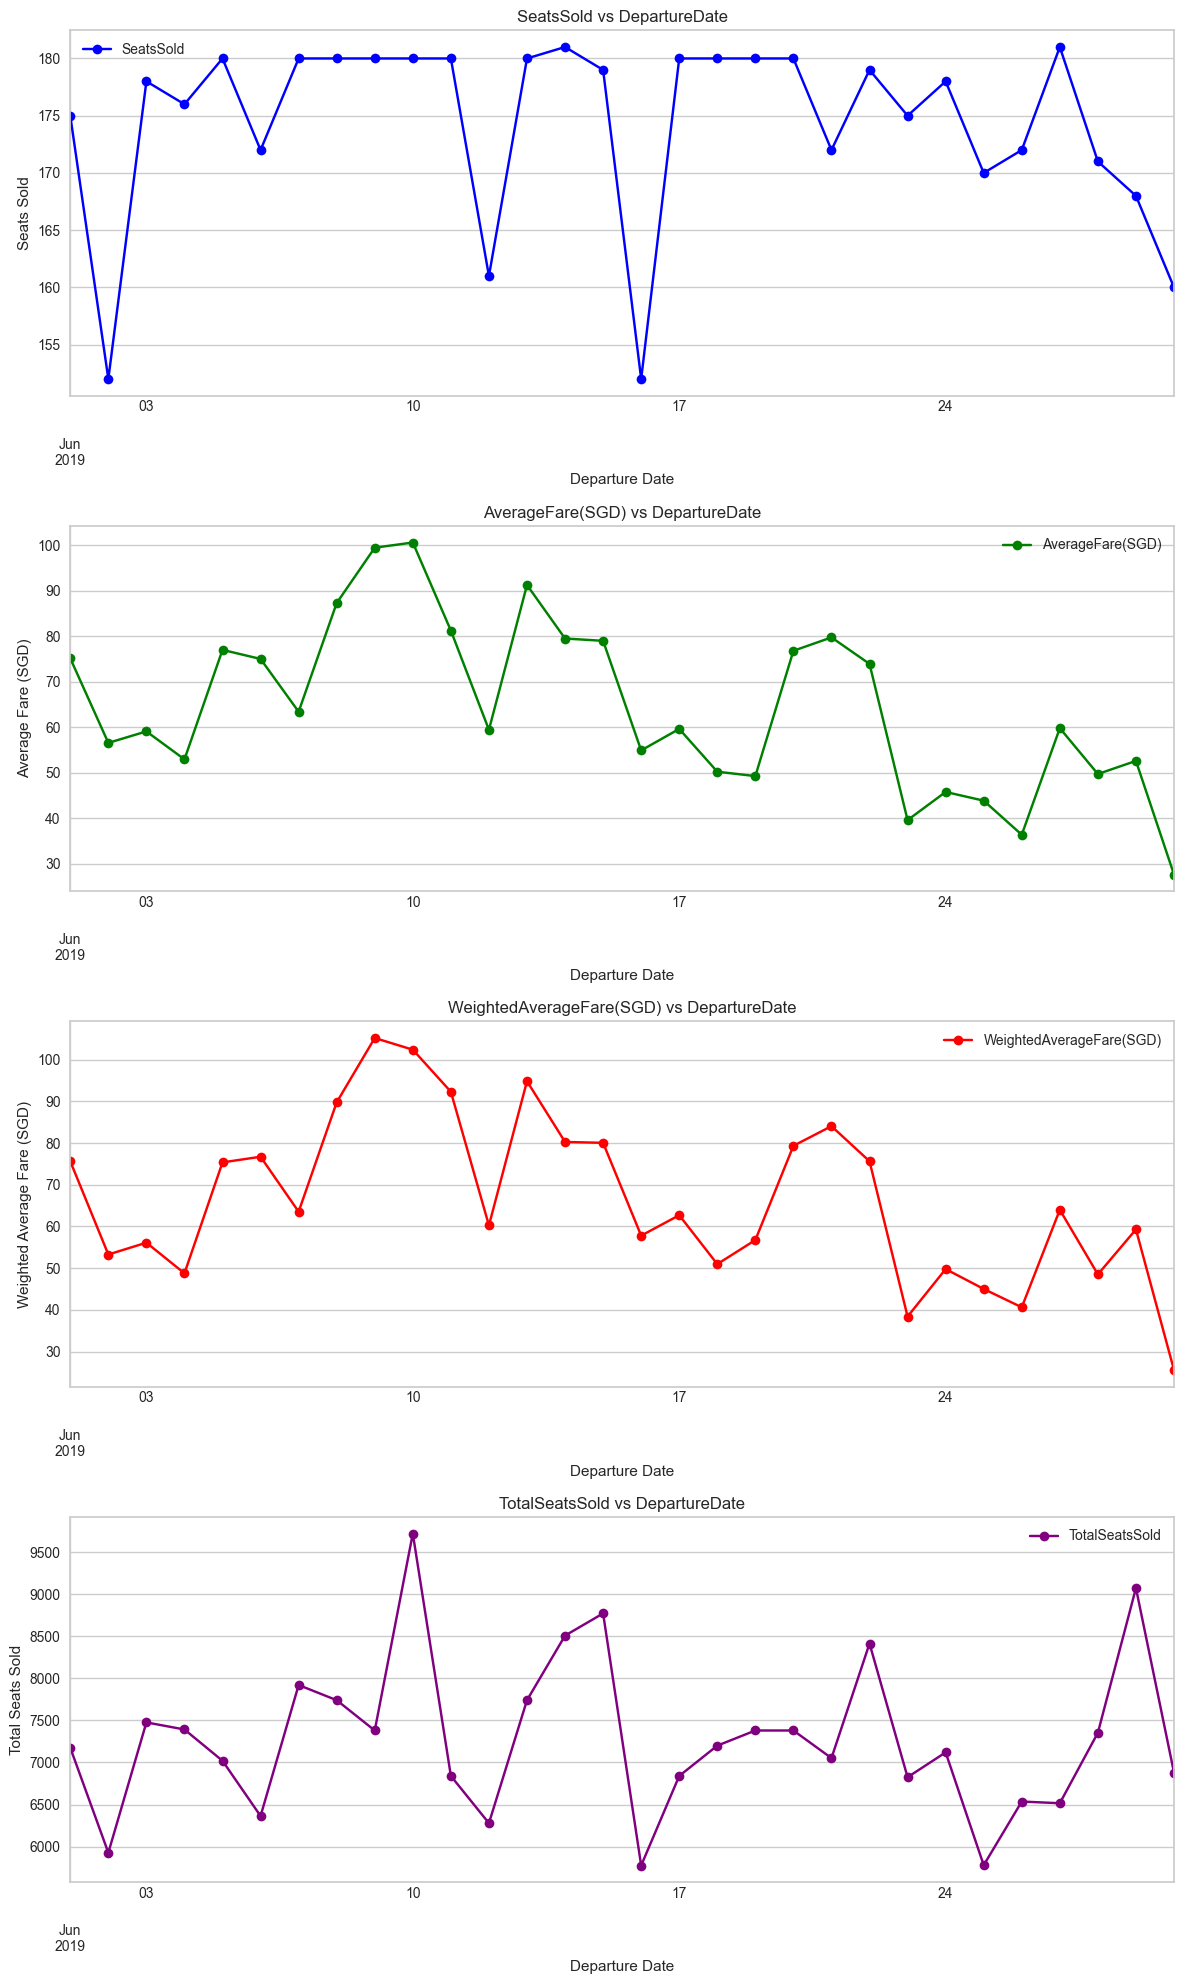

In [142]:
df_TR202_g = df_TR202.groupby('DepartureDate').agg({
    'SeatsSold': 'sum',
    'AverageFare(SGD)': 'mean',
    'WeightedAverageFare(SGD)': 'mean',
    'TotalSeatsSold': 'sum'
}).reset_index()

fig, axs = plt.subplots(4, 1, figsize=(12, 20))

# Plot SeatsSold
df_TR202_g.plot(x='DepartureDate', y='SeatsSold', ax=axs[0], title='SeatsSold vs DepartureDate', color='blue', marker='o')
axs[0].set_xlabel('Departure Date')
axs[0].set_ylabel('Seats Sold')
axs[0].grid(True)

# Plot AverageFare(SGD)
df_TR202_g.plot(x='DepartureDate', y='AverageFare(SGD)', ax=axs[1], title='AverageFare(SGD) vs DepartureDate', color='green', marker='o')
axs[1].set_xlabel('Departure Date')
axs[1].set_ylabel('Average Fare (SGD)')
axs[1].grid(True)

# Plot WeightedAverageFare(SGD)
df_TR202_g.plot(x='DepartureDate', y='WeightedAverageFare(SGD)', ax=axs[2], title='WeightedAverageFare(SGD) vs DepartureDate', color='red', marker='o')
axs[2].set_xlabel('Departure Date')
axs[2].set_ylabel('Weighted Average Fare (SGD)')
axs[2].grid(True)

# Plot TotalSeatsSold
df_TR202_g.plot(x='DepartureDate', y='TotalSeatsSold', ax=axs[3], title='TotalSeatsSold vs DepartureDate', color='purple', marker='o')
axs[3].set_xlabel('Departure Date')
axs[3].set_ylabel('Total Seats Sold')
axs[3].grid(True)

plt.tight_layout()
plt.show()

df_seats_sold_202 = df_TR202_g[['DepartureDate', 'SeatsSold']]
df_average_fare_202 = df_TR202_g[['DepartureDate', 'AverageFare(SGD)']]
df_weighted_average_fare_202 = df_TR202_g[['DepartureDate', 'WeightedAverageFare(SGD)']]
df_total_seats_sold_202 = df_TR202_g[['DepartureDate', 'TotalSeatsSold']]

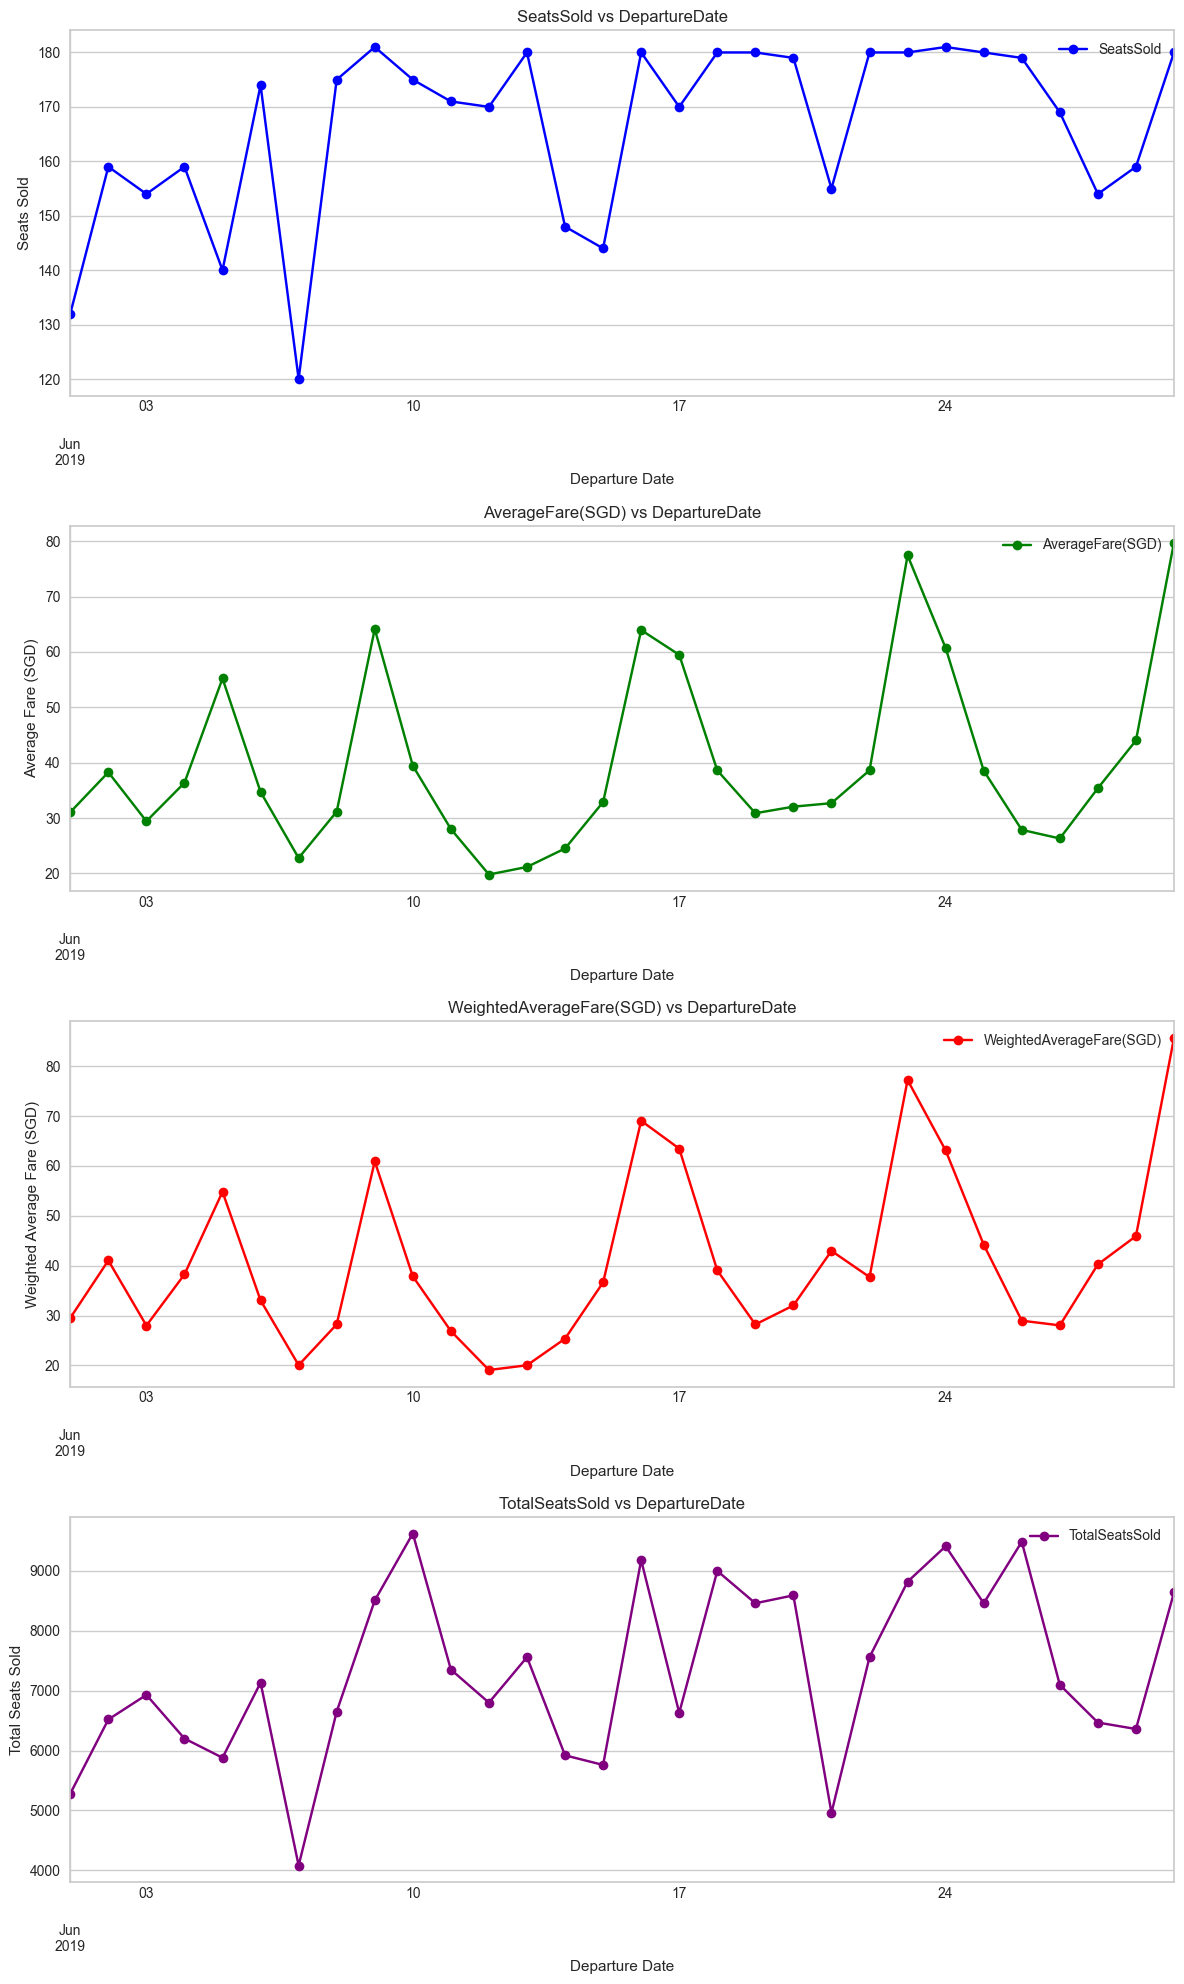

In [143]:
df_TR203_g = df_TR203.groupby('DepartureDate').agg({
    'SeatsSold': 'sum',
    'AverageFare(SGD)': 'mean',
    'WeightedAverageFare(SGD)': 'mean',
    'TotalSeatsSold': 'sum'
}).reset_index()

fig, axs = plt.subplots(4, 1, figsize=(12, 20))

# Plot SeatsSold
df_TR203_g.plot(x='DepartureDate', y='SeatsSold', ax=axs[0], title='SeatsSold vs DepartureDate', color='blue', marker='o')
axs[0].set_xlabel('Departure Date')
axs[0].set_ylabel('Seats Sold')
axs[0].grid(True)

# Plot AverageFare(SGD)
df_TR203_g.plot(x='DepartureDate', y='AverageFare(SGD)', ax=axs[1], title='AverageFare(SGD) vs DepartureDate', color='green', marker='o')
axs[1].set_xlabel('Departure Date')
axs[1].set_ylabel('Average Fare (SGD)')
axs[1].grid(True)

# Plot WeightedAverageFare(SGD)
df_TR203_g.plot(x='DepartureDate', y='WeightedAverageFare(SGD)', ax=axs[2], title='WeightedAverageFare(SGD) vs DepartureDate', color='red', marker='o')
axs[2].set_xlabel('Departure Date')
axs[2].set_ylabel('Weighted Average Fare (SGD)')
axs[2].grid(True)

# Plot TotalSeatsSold
df_TR203_g.plot(x='DepartureDate', y='TotalSeatsSold', ax=axs[3], title='TotalSeatsSold vs DepartureDate', color='purple', marker='o')
axs[3].set_xlabel('Departure Date')
axs[3].set_ylabel('Total Seats Sold')
axs[3].grid(True)

plt.tight_layout()
plt.show()

df_seats_sold_203 = df_TR203_g[['DepartureDate', 'SeatsSold']]
df_average_fare_203 = df_TR203_g[['DepartureDate', 'AverageFare(SGD)']]
df_weighted_average_fare_203 = df_TR203_g[['DepartureDate', 'WeightedAverageFare(SGD)']]
df_total_seats_sold_203 = df_TR203_g[['DepartureDate', 'TotalSeatsSold']]

In [144]:
from pycaret.time_series import TSForecastingExperiment

# Define the datasets for 203
datasets_203 = {
    "df_seats_sold_203": df_seats_sold_203,
    "df_average_fare_203": df_average_fare_203,
    "df_weighted_average_fare_203": df_weighted_average_fare_203,
    "df_total_seats_sold_203": df_total_seats_sold_203
}

# Define the datasets for 202
datasets_202 = {
    "df_seats_sold_202": df_seats_sold_202,
    "df_average_fare_202": df_average_fare_202,
    "df_weighted_average_fare_202": df_weighted_average_fare_202,
    "df_total_seats_sold_202": df_total_seats_sold_202
}

# Function to run the forecasting model and get predictions
def run_forecasting(exp, data, target_column, fh=61):
    # Setup the experiment without a specified seasonal period
    exp.setup(data=data, target=target_column, index='DepartureDate',
              session_id=42, fold=2, fh=5, enforce_exogenous=False)
    
    # Compare models and finalize the best one
    best_model = exp.compare_models()
    final_model = exp.finalize_model(best_model)
    
    # Predict future values
    future_predictions = exp.predict_model(final_model, fh=fh)
    
    # Filter predictions for August 2019
    august_predictions = future_predictions['2019-08-01':'2019-08-30']
    
    # Rename the prediction column to match the target column name
    august_predictions.rename(columns={'y_pred': target_column}, inplace=True)
    
    return august_predictions

# Initialize the TSForecastingExperiment
exp = TSForecastingExperiment()

# Collect predictions for 203 datasets into a single DataFrame
predictions_203 = pd.DataFrame()

for dataset_name, dataset in datasets_203.items():
    target_column = dataset.columns[1]  # Extract the target column name (assuming it's the second column)
    predictions = run_forecasting(exp, dataset, target_column)
    
    # Merge predictions into a single DataFrame
    if predictions_203.empty:
        predictions_203 = predictions
    else:
        predictions_203 = predictions_203.join(predictions, how='outer')

# Collect predictions for 202 datasets into a single DataFrame
predictions_202 = pd.DataFrame()

for dataset_name, dataset in datasets_202.items():
    target_column = dataset.columns[1]  # Extract the target column name (assuming it's the second column)
    predictions = run_forecasting(exp, dataset, target_column)
    
    # Merge predictions into a single DataFrame
    if predictions_202.empty:
        predictions_202 = predictions
    else:
        predictions_202 = predictions_202.join(predictions, how='outer')

,Description,Value
0,session_id,42
1,Target,SeatsSold
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(30, 1)"
5,Transformed data shape,"(30, 1)"
6,Transformed train set shape,"(25, 1)"
7,Transformed test set shape,"(5, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
theta,Theta Forecaster,0.3722,0.3732,6.6515,9.2942,0.0390,0.0386,-1.9294,0.0350
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.3965,0.3625,6.8958,8.9052,0.0407,0.0394,-0.6563,0.1250
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.3965,0.3625,6.8956,8.9050,0.0407,0.0394,-0.6562,0.0950
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.3965,0.3625,6.8956,8.9050,0.0407,0.0394,-0.6562,0.1350
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.3970,0.3628,6.9042,8.9119,0.0407,0.0394,-0.6607,0.1200
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.3973,0.3629,6.9101,8.9166,0.0408,0.0395,-0.6638,0.1200
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.3973,0.3629,6.9101,8.9166,0.0408,0.0395,-0.6638,0.1250
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.4215,0.3664,7.1987,8.9095,0.0428,0.0407,-0.3611,0.0850
exp_smooth,Exponential Smoothing,0.4267,0.3972,7.5027,9.8314,0.0440,0.0431,-1.5898,0.3800
ets,ETS,0.4268,0.3972,7.5030,9.8316,0.0440,0.0431,-1.5899,0.0450


,Description,Value
0,session_id,42
1,Target,AverageFare(SGD)
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(30, 1)"
5,Transformed data shape,"(30, 1)"
6,Transformed train set shape,"(25, 1)"
7,Transformed test set shape,"(5, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
theta,Theta Forecaster,0.6330,0.5571,7.4382,8.9411,0.1606,0.1761,0.6547,0.0350
arima,ARIMA,0.6521,0.5639,7.7906,9.2704,0.1831,0.2186,0.4788,0.0600
exp_smooth,Exponential Smoothing,0.6750,0.5973,8.0163,9.7197,0.1647,0.1771,0.5184,0.0600
ets,ETS,0.6750,0.5973,8.0163,9.7200,0.1647,0.1771,0.5184,0.0650
snaive,Seasonal Naive Forecaster,0.6857,0.6097,8.1437,9.9031,0.1906,0.2230,0.5145,0.0450
stlf,STLF,0.7588,0.6081,9.0437,9.9835,0.2203,0.2561,0.4092,0.0450
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.1152,1.0540,13.3629,17.3858,0.2551,0.3411,-0.9559,0.1800
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.1592,1.1410,13.7031,18.3938,0.2455,0.2935,-0.5212,0.1700
grand_means,Grand Means Forecaster,1.1696,1.2228,13.7691,19.5373,0.2319,0.2863,-0.6049,0.0250
croston,Croston,1.1898,1.2626,14.0106,20.2040,0.2319,0.2923,-0.7291,0.0200


,Description,Value
0,session_id,42
1,Target,WeightedAverageFare(SGD)
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(30, 1)"
5,Transformed data shape,"(30, 1)"
6,Transformed train set shape,"(25, 1)"
7,Transformed test set shape,"(5, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.6030,0.6657,7.9298,10.7979,0.1791,0.1772,0.5267,0.0500
theta,Theta Forecaster,0.6408,0.6557,8.4414,10.5745,0.1814,0.1990,0.5356,0.0400
arima,ARIMA,0.7019,0.6365,9.2187,10.3696,0.2109,0.2498,0.5159,0.0600
snaive,Seasonal Naive Forecaster,0.7565,0.7339,9.9416,11.9057,0.2197,0.2632,0.4229,0.0500
ets,ETS,0.7909,0.7869,10.3922,12.7924,0.2077,0.2380,0.3081,0.0550
stlf,STLF,0.8608,0.7674,11.3115,12.4729,0.2508,0.2895,0.3447,0.0450
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.0854,1.1807,14.2708,19.1346,0.2441,0.3026,-0.4749,0.1800
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.1530,1.2529,15.1585,20.3156,0.2570,0.3256,-0.6700,0.1250
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,1.2009,1.2484,15.7782,20.2980,0.2765,0.3613,-0.7508,0.2150
grand_means,Grand Means Forecaster,1.2180,1.3431,16.0339,21.6799,0.2658,0.3311,-0.9211,0.0250


,Description,Value
0,session_id,42
1,Target,TotalSeatsSold
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(30, 1)"
5,Transformed data shape,"(30, 1)"
6,Transformed train set shape,"(25, 1)"
7,Transformed test set shape,"(5, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ets,ETS,0.7721,0.8451,1052.7637,1408.5122,0.1600,0.1367,-0.2619,0.0500
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.8842,0.9019,1188.0374,1484.7677,0.1696,0.1553,-0.5991,0.1400
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.8846,0.9024,1188.5809,1485.5466,0.1696,0.1554,-0.6015,0.0950
exp_smooth,Exponential Smoothing,0.8921,0.9150,1198.6759,1506.5464,0.1713,0.1566,-0.6434,0.0300
polytrend,Polynomial Trend Forecaster,0.8972,0.9126,1204.4477,1500.4026,0.1708,0.1576,-0.6651,0.0150
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.8974,0.9270,1205.7309,1525.9613,0.1725,0.1576,-0.6910,0.0950
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.9098,0.9385,1220.9328,1541.3436,0.1728,0.1599,-0.7839,0.0900
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.9098,0.9385,1220.9327,1541.3434,0.1728,0.1599,-0.7839,0.0950
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.9098,0.9385,1220.9328,1541.3436,0.1728,0.1599,-0.7839,0.0900
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.9098,0.9385,1220.9328,1541.3435,0.1728,0.1599,-0.7839,0.0850


,Description,Value
0,session_id,42
1,Target,SeatsSold
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(30, 1)"
5,Transformed data shape,"(30, 1)"
6,Transformed train set shape,"(25, 1)"
7,Transformed test set shape,"(5, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
snaive,Seasonal Naive Forecaster,1.2167,1.2752,4.0000,5.1639,0.0229,0.0227,-0.7166,0.0550
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.3549,2.0373,4.8647,8.1893,0.0302,0.0286,-0.2867,1.6900
croston,Croston,1.5125,1.8622,5.5181,7.4854,0.0335,0.0323,-0.0703,0.0150
grand_means,Grand Means Forecaster,1.5400,1.8325,5.6500,7.3648,0.0341,0.0331,-0.0164,0.0300
polytrend,Polynomial Trend Forecaster,1.5844,2.2444,5.6532,9.0303,0.0348,0.0330,-0.8200,0.0200
naive,Naive Forecaster,1.6417,2.2764,5.7000,9.1684,0.0351,0.0333,-1.2340,0.0300
stlf,STLF,1.6552,1.4900,5.2848,6.0480,0.0304,0.0298,-2.2782,0.0550
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.6677,2.3269,5.8031,9.3717,0.0357,0.0339,-1.3252,1.8150
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.7883,2.4262,6.1649,9.7770,0.0378,0.0358,-1.7905,1.6100
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.8397,2.4307,6.3191,9.7955,0.0387,0.0367,-1.8131,1.6200


,Description,Value
0,session_id,42
1,Target,AverageFare(SGD)
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(30, 1)"
5,Transformed data shape,"(30, 1)"
6,Transformed train set shape,"(25, 1)"
7,Transformed test set shape,"(5, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,1.3898,1.3054,18.6058,21.6940,0.3874,0.3032,-2.0504,0.0700
grand_means,Grand Means Forecaster,1.3903,1.2840,18.6120,21.3379,0.3844,0.3037,-1.9369,0.0250
auto_arima,Auto ARIMA,1.3972,1.3138,18.7058,21.8331,0.3893,0.3045,-2.1082,0.2150
croston,Croston,1.4398,1.3114,19.2751,21.7889,0.3936,0.3121,-2.2398,0.0200
naive,Naive Forecaster,1.5782,1.4866,21.1286,24.7074,0.4416,0.3345,-2.8864,0.0350
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.6255,1.3788,21.7639,22.8885,0.4183,0.3388,-3.4587,0.1650
theta,Theta Forecaster,1.6647,1.4117,22.2885,23.4350,0.4303,0.3469,-3.6736,0.0400
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.7001,1.4993,22.7649,24.8784,0.3925,0.3324,-5.0370,0.1150
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.7464,1.5324,23.3832,25.4406,0.4457,0.3529,-4.4537,0.2500
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.8348,1.5858,24.5667,26.3209,0.4813,0.3702,-5.2081,0.1000


,Description,Value
0,session_id,42
1,Target,WeightedAverageFare(SGD)
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(30, 1)"
5,Transformed data shape,"(30, 1)"
6,Transformed train set shape,"(25, 1)"
7,Transformed test set shape,"(5, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,1.2284,1.1490,18.1296,21.0172,0.3644,0.2871,-1.7221,0.0650
auto_arima,Auto ARIMA,1.2284,1.1490,18.1296,21.0172,0.3644,0.2871,-1.7221,0.2300
grand_means,Grand Means Forecaster,1.2311,1.1295,18.1634,20.6553,0.3616,0.2879,-1.6068,0.0350
croston,Croston,1.2759,1.1737,18.8357,21.4940,0.3728,0.2963,-2.0108,0.0200
naive,Naive Forecaster,1.3962,1.3225,20.5984,24.1764,0.4181,0.3171,-2.5115,0.0350
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.4197,1.3044,21.0847,24.1241,0.3699,0.3011,-5.4262,0.1150
theta,Theta Forecaster,1.5235,1.3135,22.5529,24.1531,0.4252,0.3395,-3.7082,0.0400
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,1.6200,1.4929,24.0055,27.5088,0.4328,0.3448,-5.8182,0.0950
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.6407,1.4203,24.3133,26.1455,0.4536,0.3575,-4.8511,0.1650
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.6510,1.4391,24.4126,26.4064,0.4622,0.3612,-4.0171,0.1300


,Description,Value
0,session_id,42
1,Target,TotalSeatsSold
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(30, 1)"
5,Transformed data shape,"(30, 1)"
6,Transformed train set shape,"(25, 1)"
7,Transformed test set shape,"(5, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
grand_means,Grand Means Forecaster,0.6471,0.6489,650.1533,860.6169,0.1002,0.0932,-0.5097,0.0300
auto_arima,Auto ARIMA,0.6471,0.6489,650.1533,860.6169,0.1002,0.0932,-0.5097,0.1450
arima,ARIMA,0.6612,0.6678,664.5704,885.3560,0.1026,0.0951,-0.6258,0.0600
croston,Croston,0.6937,0.6750,697.6771,894.6845,0.1072,0.0994,-0.6724,0.0200
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.9763,0.9177,987.0056,1212.4565,0.1474,0.1343,-2.7856,0.1400
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.1248,0.9811,1138.2136,1295.1622,0.1707,0.1532,-3.5997,0.2400
theta,Theta Forecaster,1.1290,0.9603,1141.4918,1268.3645,0.1715,0.1545,-3.2483,0.0350
exp_smooth,Exponential Smoothing,1.1711,0.9961,1186.5925,1313.4913,0.1754,0.1577,-4.1553,0.0300
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,1.1729,1.1548,1186.0128,1523.9994,0.1792,0.1554,-5.5087,0.2150
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.1872,0.9823,1199.4780,1298.0073,0.1799,0.1620,-3.2911,0.1000


In [146]:
# Add FlightNumber to each dataframe
predictions_202['FlightNumber'] = 'TR 202'
predictions_203['FlightNumber'] = 'TR 203'

# Ensure 'DepartureDate' is a column
if 'DepartureDate' not in predictions_202.columns:
    predictions_202 = predictions_202.reset_index().rename(columns={'index': 'DepartureDate'})
if 'DepartureDate' not in predictions_203.columns:
    predictions_203 = predictions_203.reset_index().rename(columns={'index': 'DepartureDate'})

# Combine the dataframes
predicted_ts = pd.concat([predictions_202, predictions_203])

# Debugging step: Print out the columns in the final DataFrame
print("Columns in predicted_ts:", predicted_ts.columns)

# Ensure 'DepartureDate' is still in the columns
if 'DepartureDate' in predicted_ts.columns:
    # Reset the index (optional)
    predicted_ts = predicted_ts.reset_index(drop=True)

    # Arrange the columns in alphabetical order, with DepartureDate first
    columns_order = ['DepartureDate'] + sorted([col for col in predicted_ts.columns if col != 'DepartureDate'])
    predicted_ts = predicted_ts[columns_order]
else:
    print("Error: 'DepartureDate' is not in the columns of predicted_ts.")

# predicted_ts = predicted_ts.drop(columns=['level_0'])

# Arrange the columns in the desired order
columns_order = ['DepartureDate', 'FlightNumber'] + sorted([col for col in predicted_ts.columns if col not in ['DepartureDate', 'FlightNumber']])
predicted_ts = predicted_ts[columns_order]

# Round up SGD values to the nearest cent and seats sold to the nearest whole number
for col in predicted_ts.columns:
    if 'SGD' in col:
        predicted_ts[col] = np.ceil(predicted_ts[col] * 100) / 100
    elif 'SeatsSold' in col:
        predicted_ts[col] = np.ceil(predicted_ts[col]).astype(int)

Columns in predicted_ts: Index(['DepartureDate', 'SeatsSold', 'AverageFare(SGD)',
       'WeightedAverageFare(SGD)', 'TotalSeatsSold', 'FlightNumber'],
      dtype='object')


# Time-Series Forecasting Results

The following dataframe shows the predicted fares and seats sold for TR202 and TR203.

As a reminder:
1. **SeatsSold (Seats Predictions)**: This column shows the predicted number of seats sold, based on each entry.

2. **AverageFare(SGD) (Fare Predictions)**: This column represents the fare predictions, based on each entry.
   
3. **WeightedAverageFare(SGD) (Fare Predictions)**: This column uses a weighted approach to predict fares, considering the average of all the fares for that departure date's flight.
   
4. **TotalSeatsSold (Seats Predictions)**: Similar to the SeatsSold predictions, considering total seat availability for for that departure date's flight.

In [147]:
predicted_ts

,DepartureDate,FlightNumber,AverageFare(SGD),SeatsSold,TotalSeatsSold,WeightedAverageFare(SGD)
0,2019-08-01,TR 202,63.36,180,7280,65.21
1,2019-08-02,TR 202,63.36,172,7280,65.21
2,2019-08-03,TR 202,63.36,179,7280,65.21
3,2019-08-04,TR 202,63.36,175,7280,65.21
4,2019-08-05,TR 202,63.36,178,7280,65.21
5,2019-08-06,TR 202,63.36,170,7280,65.21
6,2019-08-07,TR 202,63.36,172,7280,65.21
7,2019-08-08,TR 202,63.36,181,7280,65.21
8,2019-08-09,TR 202,63.36,171,7280,65.21
9,2019-08-10,TR 202,63.36,168,7280,65.21


# **Conclusion**

## **Could The Regression Model Truly Predict the Remaining Seats to be Sold in August 2019?**

The answer is **not really**. While the model provides predictions based on historical data and other features, it's essential to understand that there are limitations:

**predicted_regress**

This dataframe shows the regression model predictions for flight TR202 and TR203:

1. **Fare Predictions (Based on AverageFare(SGD))**:
   - The predicted fare generally varies within a range of SGD 51 to SGD 68, with most values clustering between SGD 53 and SGD 57. This suggests that the model expects the average fare to stay relatively stable throughout the month, with a slight increase on August 20th, possibly due to anticipated higher demand.

2. **Seats Predictions (Based on SeatsSold)**:
   - The seat predictions in this column consistently hover around 4 to 5, which seems to be an unusual representation if it indicates actual numbers of seats sold. Given that this value is low, it might suggest that the model is predicting in terms of blocks of seats or uses a scaling factor that isn’t directly interpretable as the actual number of seats. Alternatively, this could be an error or misinterpretation in the prediction results.

3. **Fare Predictions (Based on WeightedAverageFare(SGD))**:
   - The weighted average fare predictions show even less variability than the average fare, almost consistently predicting SGD 49.0 across all dates, with only minor deviations (SGD 48 or SGD 50 on a few dates). This suggests the model assumes a stable pricing strategy that doesn’t fluctuate much with expected demand or other variables.

4. **Seats Predictions (Based on TotalSeatsSold)**:
   - The total seats sold predictions are fairly consistent, with most values around 170 to 172. These values align more closely with the seat capacity of the airplane (180 seats) and suggest that the model expects near-full occupancy for most flights.

**Additional Insights**

- **Model Consistency**:
   - The model shows a high level of consistency in its predictions, especially for weighted average fare and total seats sold. This could indicate that the model is built on a stable, non-volatile dataset where prices and seat sales don’t vary much day-to-day.

- **Potential Model Limitations**:
   - The low variation in fare predictions (particularly in the weighted average) and the somewhat confusing low seat predictions based on seats sold suggest that the model might be oversimplifying its predictions. It might not be fully capturing the day-to-day fluctuations that are typical in airline sales, such as those caused by promotional activities, holidays, or other demand spikes.

- **Focus on Full Occupancy**:
   - The prediction for total seats sold hovering near 171-172 indicates that the model expects the flight to operate near full capacity consistently. This is a good sign in terms of operational efficiency, as it implies that most flights are expected to be fully booked.

Overall, this dataframe provides a stable and somewhat conservative outlook on flight TR202's performance throughout August 2019, with predictions suggesting consistent pricing and near-full capacity for each flight. However, the lack of variability in the predictions raises questions about the model's ability to adapt to sudden changes in market conditions.

In [153]:
predicted_regress

,DepartureDate,FlightNumber,AverageFare(SGD),SeatsSold,TotalSeatsSold,WeightedAverageFare(SGD)
0,2019-08-01,TR 202,57.0,5,172,48.0
1,2019-08-02,TR 202,54.0,4,171,49.0
2,2019-08-03,TR 202,55.0,5,172,49.0
3,2019-08-04,TR 202,57.0,5,172,49.0
4,2019-08-05,TR 202,55.0,5,172,50.0
5,2019-08-06,TR 202,51.0,5,172,49.0
6,2019-08-07,TR 202,55.0,5,172,48.0
7,2019-08-08,TR 202,59.0,5,172,49.0
8,2019-08-09,TR 202,56.0,4,170,49.0
9,2019-08-10,TR 202,56.0,4,171,49.0


## **Could The Time-Series Model Truly Predict the Remaining Seats to be Sold in August 2019?**

The answer is **it's better than the regression model**. Here’s why:

**predicted_ts**

This dataframe shows the time-series model predictions for flight TR202 and TR203:

1. **For TR202 predictions**:
   - The model did not detect sufficient variability or patterns in the historical data used for training, leading it to predict the same `AverageFare`, `WeightedAverageFare`, and `TotalSeatsSold` for all dates in August 2019. This could be addressed by incorporating more diverse and extensive historical data, adjusting the model parameters, or considering different preprocessing techniques to better capture any underlying trends or patterns in the data.

2. **For TR203 predictions**:
   - Unlike the predictions for TR202 (`predictions_202`), which were static, these predictions exhibit a dynamic range, indicating that the model detected and accounted for underlying trends and fluctuations in the data. The observed fluctuations in `SeatsSold` and fare-related metrics reflect the model's sensitivity to underlying trends and external influences, making it a potentially valuable tool for forecasting in the airline industry.

   However, ongoing evaluation and refinement are necessary to ensure the model's continued relevance and accuracy in a highly dynamic market.

   - **Overbooking Scenario**:
     - It must be made known that the airplane used has a seat limit of 180. The model predicts that the number of seats bought could exceed this limit due to an increasing trend in demand. Is this necessarily a good or bad thing for overbooking a plane?

     - **Good Scenario**: If the model is accurately predicting a realistic overbooking scenario, where the actual number of passengers who show up will still fall within the 180-seat limit, this can be a good strategy for maximizing revenue. In this case, the model helps the airline optimize its booking strategy by filling as many seats as possible, even accounting for potential no-shows.

     - **Bad Scenario**: If the model overestimates the number of no-shows, leading to predictions that consistently exceed the 180-seat limit without sufficient no-shows to balance out, this could result in too many passengers showing up. The airline would then face the challenges of overbooking, such as needing to compensate bumped passengers and handling customer dissatisfaction.

**Additional Insights**
- **Impact of Market Dynamics**:
   - The model's ability to predict varying outcomes suggests it may be sensitive to changes in market dynamics, such as competitor pricing, macroeconomic conditions, or unexpected events. This adaptability is beneficial, but it also means that the model must be closely monitored and recalibrated as market conditions evolve.

In conclusion, while the time-series model shows improvements over the regression model, particularly in detecting trends and variability, careful consideration is needed when applying these predictions, especially regarding overbooking practices.

In [149]:
predicted_ts

,DepartureDate,FlightNumber,AverageFare(SGD),SeatsSold,TotalSeatsSold,WeightedAverageFare(SGD)
0,2019-08-01,TR 202,63.36,180,7280,65.21
1,2019-08-02,TR 202,63.36,172,7280,65.21
2,2019-08-03,TR 202,63.36,179,7280,65.21
3,2019-08-04,TR 202,63.36,175,7280,65.21
4,2019-08-05,TR 202,63.36,178,7280,65.21
5,2019-08-06,TR 202,63.36,170,7280,65.21
6,2019-08-07,TR 202,63.36,172,7280,65.21
7,2019-08-08,TR 202,63.36,181,7280,65.21
8,2019-08-09,TR 202,63.36,171,7280,65.21
9,2019-08-10,TR 202,63.36,168,7280,65.21


## **Final Thoughts**

The following shows the actual metrics for the month of August starting from 2019-08-04 to 2019-08-12. 	

In [150]:
# Data for the DataFrame
data = {
    'DepartureDate': [
        '2019-08-04', '2019-08-04', '2019-08-05', '2019-08-05', '2019-08-06', '2019-08-06',
        '2019-08-07', '2019-08-07', '2019-08-08', '2019-08-08', '2019-08-09', '2019-08-09',
        '2019-08-10', '2019-08-10', '2019-08-11', '2019-08-11', '2019-08-12', '2019-08-12'
    ],
    'Flight Number': [
        'TR 202', 'TR 203', 'TR 202', 'TR 203', 'TR 202', 'TR 203',
        'TR 202', 'TR 203', 'TR 202', 'TR 203', 'TR 202', 'TR 203',
        'TR 202', 'TR 203', 'TR 202', 'TR 203', 'TR 202', 'TR 203'
    ],
    'Seat Capacity': [180] * 18,
    'SegmentCityPair': [
        'SINPNH', 'PNHSIN', 'SINPNH', 'PNHSIN', 'SINPNH', 'PNHSIN',
        'SINPNH', 'PNHSIN', 'SINPNH', 'PNHSIN', 'SINPNH', 'PNHSIN',
        'SINPNH', 'PNHSIN', 'SINPNH', 'PNHSIN', 'SINPNH', 'PNHSIN'
    ],
    'Seats Sold': [
        50, 52, 59, 27, 67, 49,
        59, 42, 54, 57, 98, 56,
        46, 63, 38, 44, 29, 87
    ],
    'AverageFare (SGD)': [
        15.04, 26.99, 14.57, 24.09, 34.61, 14.93,
        61.90, 11.68, 138.42, 15.59, 193.64, 29.27,
        74.96, 35.21, 12.22, 34.03, 5.71, 207.39
    ]
}

# Creating the DataFrame
actual_august_metrics = pd.DataFrame(data)
actual_august_metrics = actual_august_metrics.sort_values(by=['Flight Number', 'DepartureDate',])
actual_august_metrics = actual_august_metrics.reset_index(drop=True)

actual_august_metrics

,DepartureDate,Flight Number,Seat Capacity,SegmentCityPair,Seats Sold,AverageFare (SGD)
0,2019-08-04,TR 202,180,SINPNH,50,15.04
1,2019-08-05,TR 202,180,SINPNH,59,14.57
2,2019-08-06,TR 202,180,SINPNH,67,34.61
3,2019-08-07,TR 202,180,SINPNH,59,61.90
4,2019-08-08,TR 202,180,SINPNH,54,138.42
5,2019-08-09,TR 202,180,SINPNH,98,193.64
6,2019-08-10,TR 202,180,SINPNH,46,74.96
7,2019-08-11,TR 202,180,SINPNH,38,12.22
8,2019-08-12,TR 202,180,SINPNH,29,5.71
9,2019-08-04,TR 203,180,PNHSIN,52,26.99


### **Regression Model**
While the regression model provides a reasonable estimate based on the available data, the predictions might not accurately reflect the reality of seat sales in August 2019 due to its limitations in handling time-dependent factors. Additionally, the limited dataset (only June 2019) further constrains the model's ability to make accurate predictions. 

For more accurate forecasting, especially in the airline industry where demand fluctuates based on numerous time-dependent factors, a dedicated time-series model, combined with more extensive historical data, could provide more reliable results.

### **Time-Series Model**
The time-series model offers a more accurate approach to predicting seat sales, but its effectiveness is directly tied to the quality and quantity of the historical data available. A model trained on a robust dataset that includes multiple years of data will likely outperform one that is limited to a shorter time frame. This is because long-term patterns, such as year-over-year trends, can be crucial in making accurate predictions.

However, the model is not without its challenges. Time-series forecasting can be complex and may require fine-tuning to adjust to sudden changes in the market, such as economic downturns, unexpected events, or changes in customer behavior. Additionally, the model may need to be regularly updated with new data to maintain its accuracy over time.

Therefore, while the prediction of exceeding 180 seats could indicate a proactive strategy to maximize revenue, it also highlights the importance of closely monitoring the actual show-up rates and being prepared with contingency plans to manage any potential overbooking fallout.

### **Remarks**
It is also important to note that no fine-tuning was done to either model, which could prove vital in providing even better results.